## Laboratory Session 06
### Sabrina Giorgetti
### Matricola: 2013375
### Email: sabrina.giorgetti@studenti.unipd.it

In [13]:
# for full width
#IRdisplay::display_html('<style>.container { width:85% !important; }</style>')

library(tidyverse)
library(gridExtra)
library(EnvStats)
library(latex2exp)
library(ggpubr)
library(devtools)
library(geometry)
library(R.utils)
library(bayestestR)
library(cbinom)
library(EbayesThresh)
library(stats)
#options(repr.plot.width = 10, repr.plot.height = 6) 
#par(mfrow=c(1, 2))

## Exercise 1

The  number  of  particles  emitted  by  a  radioactive  source  during  a  fixed  interval  of  time  (∆t=10 s) follows a Poisson distribution on the parameter μ.  The number of particles observed during consecutive time intervals is:  4, 1, 3, 1 and 3

1. Suppose a uniform prior distribution for the parameter μ
   -  determine and draw the posterior distribution for μ, given the data
   -  evaluate mean, median and variance, both analytically and numerically in R

In our case we can consider each measurament of the number of particles as an independent measure, thus the likelihood for multiple  measurements is given by: 
$$ f(\{x_j\}| \mu) = \sum_{j=1}^n f(x_j| \mu) \propto \mu^{\sum x_j} e^{-n \mu}$$

We can observe that this is similar to the Gamma distribution: 

$$ Gamma(x| \alpha, \lambda) = \frac{\lambda^{\alpha}}{\Gamma(\alpha)} x^{\alpha-1} e^{-\lambda x} \; \text{with}  \; \; \alpha= \sum x_j +1 \; \; \text{and} \; \; \lambda=n$$

Considering a uniform prior such that:

$$ g(\mu) = 1 \; \; \text{for} \; \; \mu > 0$$

the posterior becomes: 

$$P(\mu | \{x_j\}) \; \propto \;  f(\{x_j\}| \mu) \cdot g(\mu) \; \; \propto \;  \mu^{\sum x_j} e^{- n \mu} $$

that can be simply written as: 

$$ Gamma(\alpha, \lambda) \; \; \;  \text{with}  \; \; \alpha= \sum x_j +1 \; \; \text{and} \; \; \lambda=n $$ 


Analytically 
 Mean:  2.6
 Variance:  0.52 
Numerically 
 Mean:  2.6
 Variance:  0.52 
 Median:  2.53

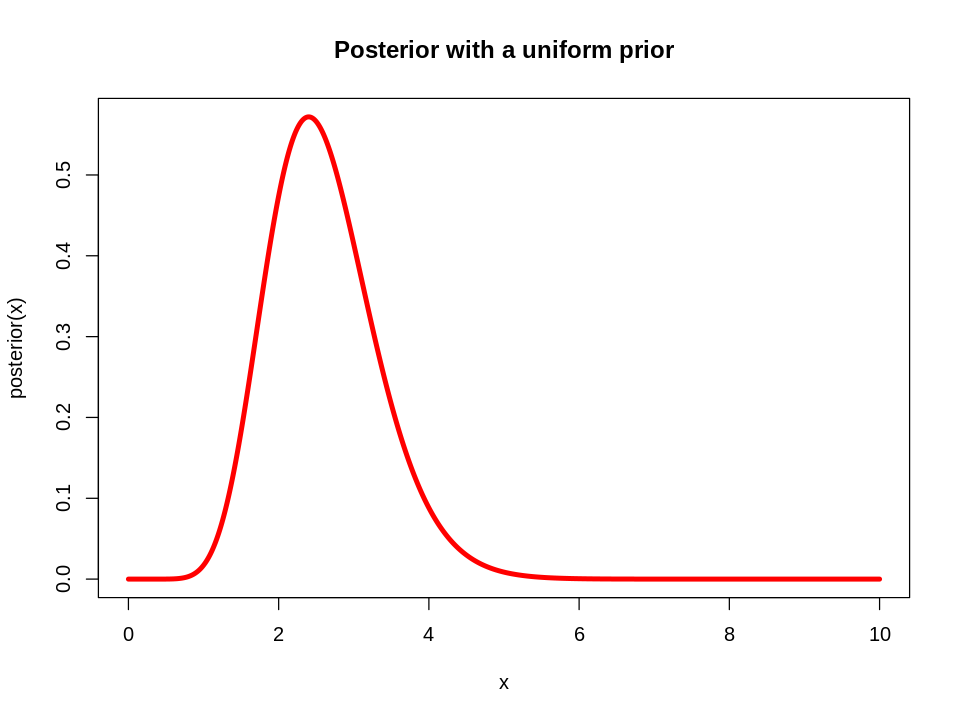

In [2]:
prior <- dgamma(1,0)
measure<-c(4,1,3,1,3)
alpha <- sum(measure)+1
lambda <- length(measure)
posterior <-function(x){dgamma(x, shape=alpha, rate=lambda)} 

n.sample<-2000;
delta.x<-1/n.sample
x<-seq(1/(2*n.sample),10, by=1/n.sample)

options(repr.plot.width = 8, repr.plot.height = 6) 
plot(x, posterior(x), type="l", col="red", lwd=4, lty=1, main="Posterior with a uniform prior")



#analytically
mean.a <-  alpha*(1/lambda)
var.a <-   alpha*(1/lambda^2)

cat("Analytically")
cat(" \n Mean: ",mean.a)
cat("\n Variance: ",var.a, "\n")

#numerically
mean.n <- delta.x*sum(x*posterior(x))
var.n <- delta.x*sum(x^2*posterior(x))-mean.n^2 #Var(x) = E(x^2)- E(x)^2
median.n <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.50, interval=c(0,10), extendInt = "yes")$root
#median.n
#rand  <-function(x){rgamma(x, shape=alpha, rate=lambda)} 
#median(rand(x), na.rm = TRUE)
                    
cat("Numerically")
cat(" \n Mean: ",mean.n)  
cat("\n Variance: ", var.n )  
cat(" \n Median: ", sprintf("%.2f",median.n))


2. Suppose a Jeffrey’s prior for the parameter μ
   -  determine and draw the posterior distribution for μ, given the data
   -  evaluate mean, median and variance, both analytically and numerically in R

Considering a Jefferey's prior : 

$$ g(\mu) \propto \frac{1}{\sqrt \mu} \; \; \; \text{for} \; \; \mu > 0$$

the posterior distribution, with the same likelihood function of the first case, is given by: 


$$P(\mu | \{x_j\}) \; \propto \;  f(\{x_j\}| \mu) \cdot g(\mu) \; \; \propto \;  \mu^{\sum x_j} \cdot e^{- n \mu} \cdot   \frac{1}{\sqrt \mu} \propto \mu^{\sum x_j - 1/2} \cdot e^{- n \mu} $$

and this is again a gamma distribution: 

$$ Gamma(\alpha, \lambda) \; \; \;  \text{with}  \; \; \alpha= \sum x_j + \frac{1}{2} \; \; \text{and} \; \; \lambda=n $$ 

Analytically 
 Mean:  2.5
 Variance:  0.5 
Numerically 
 Mean:  2.5
 Variance:  0.5 
 Median:  2.43

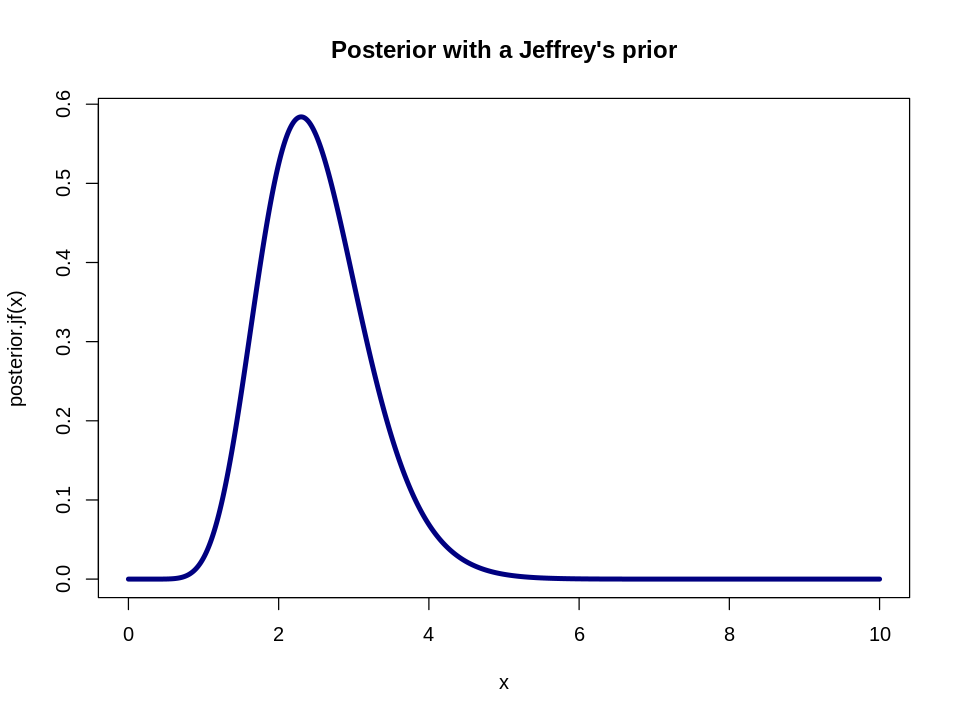

In [3]:
measure<-c(4,1,3,1,3)
alpha.jf <- sum(measure)+ (1/2) # sum y_i + 1/2
lambda.jf <- length(measure) #lambda + n

posterior.jf <-function(x){dgamma(x, shape=alpha.jf, rate=lambda.jf)} 

n.sample<-2000;
delta.x<-1/n.sample
x<-seq(1/(2*n.sample),10, by=1/n.sample)

options(repr.plot.width = 8, repr.plot.height = 6) 

plot(x, posterior.jf(x),type="l", col="navy", lwd=4, lty=1,  main="Posterior with a Jeffrey's prior")
#lines(x, posterior(x),type="l", col="red")


#analytically
mean.a.jf <-  alpha.jf*(1/lambda.jf)
var.a.jf <-   alpha.jf*(1/lambda.jf^2)


cat("Analytically")
cat(" \n Mean: ",mean.a.jf)
cat("\n Variance: ",var.a.jf, "\n")


#numerically
mean.n.jf <- delta.x*sum(x*posterior.jf(x))
var.n.jf <- delta.x*sum(x^2*posterior.jf(x))-mean.n.jf^2 #Var(x) = E(x^2)- E(x)^2
median.n.jf <- uniroot(function(x) integrate(posterior.jf,lower=0, upper=x)$value - 0.50, interval=c(0,10), extendInt = "yes")$root

cat("Numerically")
cat(" \n Mean: ",mean.n.jf)  
cat("\n Variance: ", var.n.jf )  
cat(" \n Median: ",  sprintf("%.2f",median.n.jf))


3. Evaluate a 95% credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

The credibility interval are:
 With a uniform prior:  1.38 - 4.19
 With a Jeffrey's prior:  1.31 - 4.06 
The credibility interval, with the normal approximation of the posterior, are:
 With a uniform prior:  1.19 - 4.02
 With a Jeffrey's prior:  1.12 - 3.89

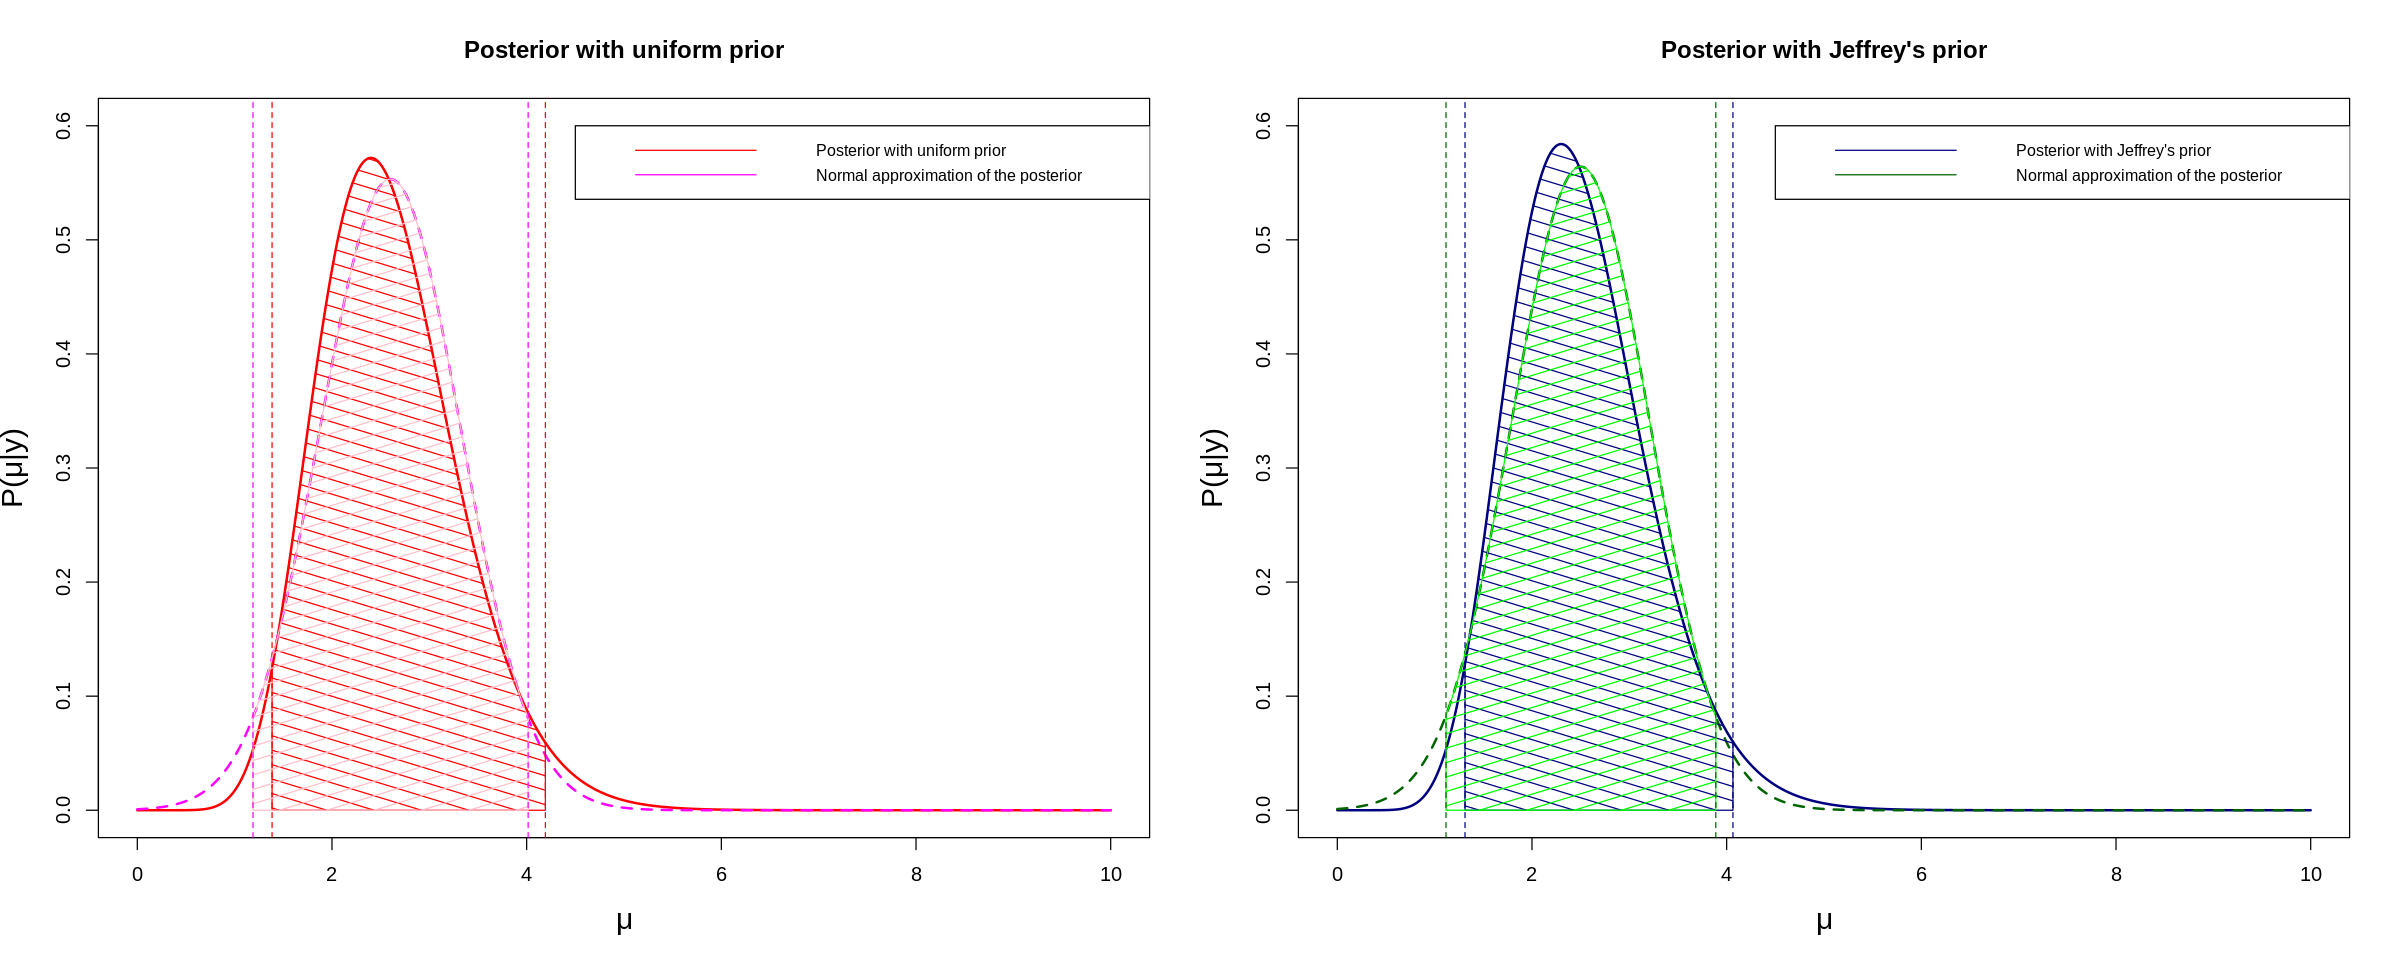

In [4]:
#Updadated credibility interval (both for symmetric and asymmetic posterior)
cred_func <- function(posterior){
x <-seq(0,10,0.001)
low <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.025, interval=c(0,2), extendInt = "yes")$root
upper <- uniroot(function(x) integrate(posterior,lower=0, upper=x)$value - 0.975, interval=c(0,2), extendInt = "yes")$root
return(c(low, upper))
}

                
#posterior with unform prior               
cred.interval.norm <- cred_func(posterior)
                
#posterior with jeffrey
cred.interval.jf <- cred_func(posterior.jf)

                 
# normal approximation for the posterior distribution
mu.unif <- mean.n
sd.unif <-sqrt(var.n)

mu.jf <- mean.n.jf
sd.jf <- sqrt(var.n.jf)
normal.posterior <- function(x){dnorm(x, mean = mu.unif, sd = sd.unif)}
normal.posterior.jf <- function(x){dnorm(x, mean = mu.jf, sd = sd.jf)}


                
#posterior with unform prior               
cred.interval.norm.appx <- cred_func(normal.posterior)
                
#posterior with jeffrey
cred.interval.jf.appx <- cred_func(normal.posterior.jf)

                
cat("The credibility interval are:")
cat("\n With a uniform prior: ",sprintf("%.2f", cred.interval.norm[1]),"-",sprintf("%.2f", cred.interval.norm[2]) )
cat("\n With a Jeffrey's prior: ",sprintf("%.2f", cred.interval.jf[1]),"-",sprintf("%.2f", cred.interval.jf[2]), "\n")
                

cat("The credibility interval, with the normal approximation of the posterior, are:")
cat("\n With a uniform prior: ",sprintf("%.2f", cred.interval.norm.appx[1]),"-",sprintf("%.2f", cred.interval.norm.appx[2]) )
cat("\n With a Jeffrey's prior: ",sprintf("%.2f", cred.interval.jf.appx[1]),"-",sprintf("%.2f", cred.interval.jf.appx[2]) )


#PLOT
par(mfrow=c(1, 2))
options(repr.plot.width = 20, repr.plot.height = 8) 

#uniform
plot(x, posterior(x),type="l",lwd=2, ylim=c(0,0.6), ylab="P(μ|y)", xlab="μ", col="red", cex.axis=1,cex.lab = 1.5)
lines(x, normal.posterior(x),type="l",lwd=2, lty=2, ylim=c(0,0.6), ylab="P(μ|y)", xlab="μ", col="magenta", cex.axis=1,cex.lab = 1.5)
legend(x=4.5, y=0.6, legend=c("Posterior with uniform prior", "Normal approximation of the posterior"),
       col=c("red", "magenta"), lty=1, cex=0.8)


#cred posterior 
x.norm <-c(cred.interval.norm[1], seq(cred.interval.norm[1], cred.interval.norm[2],0.0001), cred.interval.norm[2])
y.norm <-c(0,posterior( seq(cred.interval.norm[1], cred.interval.norm[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 15, angle = -45,col="red")  
title(main=paste("Posterior with uniform prior"))               
#text(x = cred.interval.norm[1]-0.3, y = 0.5, srt=90, col="black", label = paste("x =", sprintf("%.2f", cred.interval.norm[1])), cex = 1)
#text(x = cred.interval.norm[2]+0.3, y = 0.5, col="black", label = paste("x =", sprintf("%.2f", cred.interval.norm[2])) ,
 #srt = 0, cex = 1, xpd=TRUE, srt = 90)
abline(v=cred.interval.norm[1],lty=2, lwd=1, col="red")
abline(v=cred.interval.norm[2],lty=2, lwd=1, col="red")


x.norm <-c(cred.interval.norm.appx[1], seq(cred.interval.norm.appx[1], cred.interval.norm.appx[2],0.0001), cred.interval.norm.appx[2])
y.norm <-c(0,normal.posterior( seq(cred.interval.norm.appx[1], cred.interval.norm.appx[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 15, angle = 45,col="pink")  
#text(x = cred.interval.norm.appx[1]-0.3, y = 0.5, srt=90, col="black", label = paste("x =", sprintf("%.2f", cred.interval.norm.appx[1])), cex = 1)
#text(x = cred.interval.norm.appx[2]+0.3, y = 0.5, col="black", label = paste("x =", sprintf("%.2f", cred.interval.norm.appx[2])) ,
 #srt = 0, cex = 1, srt = 90)
abline(v=cred.interval.norm.appx[1],lty=2, lwd=1, col="magenta")
abline(v=cred.interval.norm.appx[2],lty=2, lwd=1, col="magenta")

#JEFFREY
plot(x, posterior.jf(x),type="l",lwd=2, ylim=c(0,0.6), ylab="P(μ|y)", xlab="μ", col="navy", cex.axis=1,cex.lab = 1.5)
lines(x, normal.posterior.jf(x),type="l",lwd=2, lty=2, ylim=c(0,0.6), ylab="P(μ|y)", xlab="μ", col="darkgreen", cex.axis=1,cex.lab = 1.5)
title(main=paste("Posterior with Jeffrey's prior"))               


#cred posterior.jf 
x.norm <-c(cred.interval.jf[1], seq(cred.interval.jf[1], cred.interval.jf[2],0.0001), cred.interval.jf[2])
y.norm <-c(0,posterior.jf( seq(cred.interval.jf[1], cred.interval.jf[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 15, angle = -45,col="navy")  
#text(x = cred.interval.jf[1]-0.3, y = 0.5, srt=90, col="black", label = paste("x =", sprintf("%.2f", cred.interval.jf[1])), cex = 1)
#text(x = cred.interval.jf[2]+0.3, y = 0.5, col="black", label = paste("x =", sprintf("%.2f", cred.interval.jf[2])) ,
 #srt = 0, cex = 1, xpd=TRUE, srt = 90)
abline(v=cred.interval.jf[1],lty=2, lwd=1, col="navy")
abline(v=cred.interval.jf[2],lty=2, lwd=1, col="navy") 

#cred posterior.jf norm          
x.norm <-c(cred.interval.jf.appx[1], seq(cred.interval.jf.appx[1], cred.interval.jf.appx[2],0.0001), cred.interval.jf.appx[2])
y.norm <-c(0,normal.posterior.jf( seq(cred.interval.jf.appx[1], cred.interval.jf.appx[2],0.0001)),0)
polygon(x.norm,y=y.norm, density = 15, angle = 45,col="green")  
#text(x = cred.interval.jf.appx[1]-0.4, y = 0.5, srt=90, col="black", label = paste("x =", sprintf("%.2f", cred.interval.jf.appx[1])), cex = 1)
#text(x = cred.interval.jf.appx[2]+0.4, y = 0.5, col="black", label = paste("x =", sprintf("%.2f", cred.interval.jf.appx[2])) ,
 #srt = 0, cex = 1, xpd=TRUE, srt = 90)
abline(v=cred.interval.jf.appx[1],lty=2, lwd=1, col="darkgreen")
abline(v=cred.interval.jf.appx[2],lty=2, lwd=1, col="darkgreen") 

legend(x=4.5, y=0.6, legend=c("Posterior with Jeffrey's prior", "Normal approximation of the posterior"),
       col=c("navy", "darkgreen"), lty=1, cex=0.8)


## Exercise 2

Given the problem of the lightouse discussed last week, study the case in which both the position along the shore (α) and the distance out at sea (β) are unknown. 

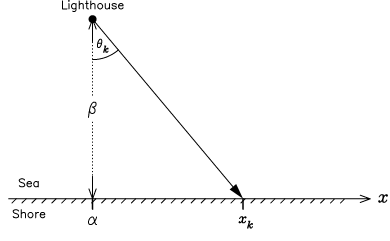

Let's first consider the azimut angle $\theta_k$, for this we can take into consideration a uniform likelihood:

$$P(\theta_k|\alpha, \beta)=\frac{1}{\pi}$$

where $\theta_k$ is connected to $\alpha$ $\beta$ by the relation that returns the position $x$: 

$$x_k= \beta tan(\theta_k) + \alpha $$.


In order to evaluate $P(x| \alpha, \beta)$, we can appley a change of variable, with $p(x)dx=p(\theta)\theta $ and obtain the following:

$$P(x| \alpha, \beta) = P(\theta| \alpha \beta)   \left| \frac{d\theta}{dx} \right| =  \frac{1}{\pi} \frac{\beta}{(x-\alpha)^2 + \beta^2}$$



Now, in our case both $\alpha$ and $\beta$ unknown, considering the two parameter independent, the posterior is given by:

$$P(\alpha, \beta | \{x_k\}) \propto P(\{x_k\} | \alpha, \beta) P(\alpha) P(\beta)$$

For the prior distibution of $\alpha$ and $\beta$  we can assume a uniform prior as follows: 

$$ P(\alpha)=
\begin{cases}
  \frac{1}{\alpha_{max}-\alpha_{min}} & \text{for } \alpha \in[\alpha_{min},\alpha_{max}] \\
  0 & \text{otherwise}
\end{cases}
$$

$$
P(\beta) = 
\begin{cases}
  \frac{1}{h} & \text{for } \beta \in[0,h] \\
  0 & \text{otherwise}
\end{cases}
$$

with $\alpha_{min}$ and $\alpha_{max}$ the minimum and maximum value that $\alpha$ can assume and $h$ as the maximum value of the distance from the shore. 

The likelihood is instead given by the product of the orobabilities for N individual measuraments: 

$$ p(\{x_k\} | \alpha, \beta) = \prod_{k=1}^N p(x_k | \alpha, \beta) \; \; \; \; \; \overset{logarithm}{\rightarrow}  \; \; \; log( p(\{x_k\} | \alpha, \beta)) = cost \; - log \left( 1+ \frac{(x-\alpha)^2}{\beta^2}\right) $$ 

In the end, as we are considering uniform priors,the posterior coincides with likelihood up to a constant factor, evaluating the logarithm of the posterior we get:

$$ log (P(\alpha, \beta | \{x_k\})) = cost \; - log \left( 1+ \frac{(x-\alpha)^2}{\beta^2}\right) $$


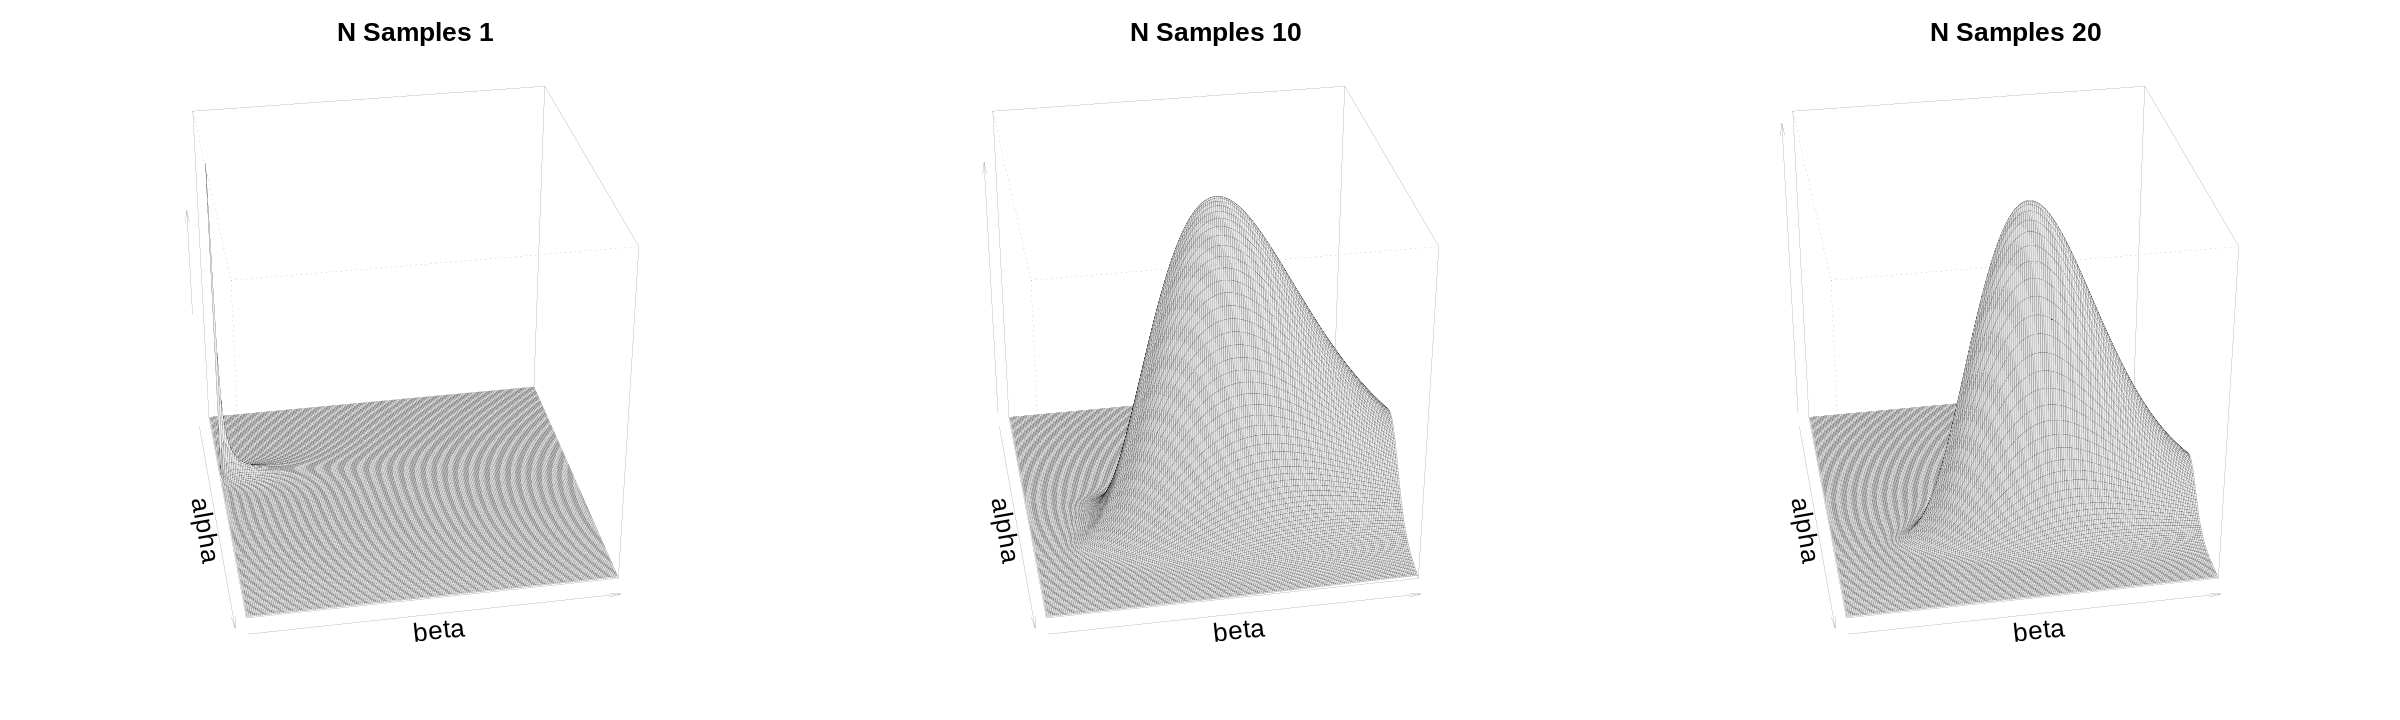

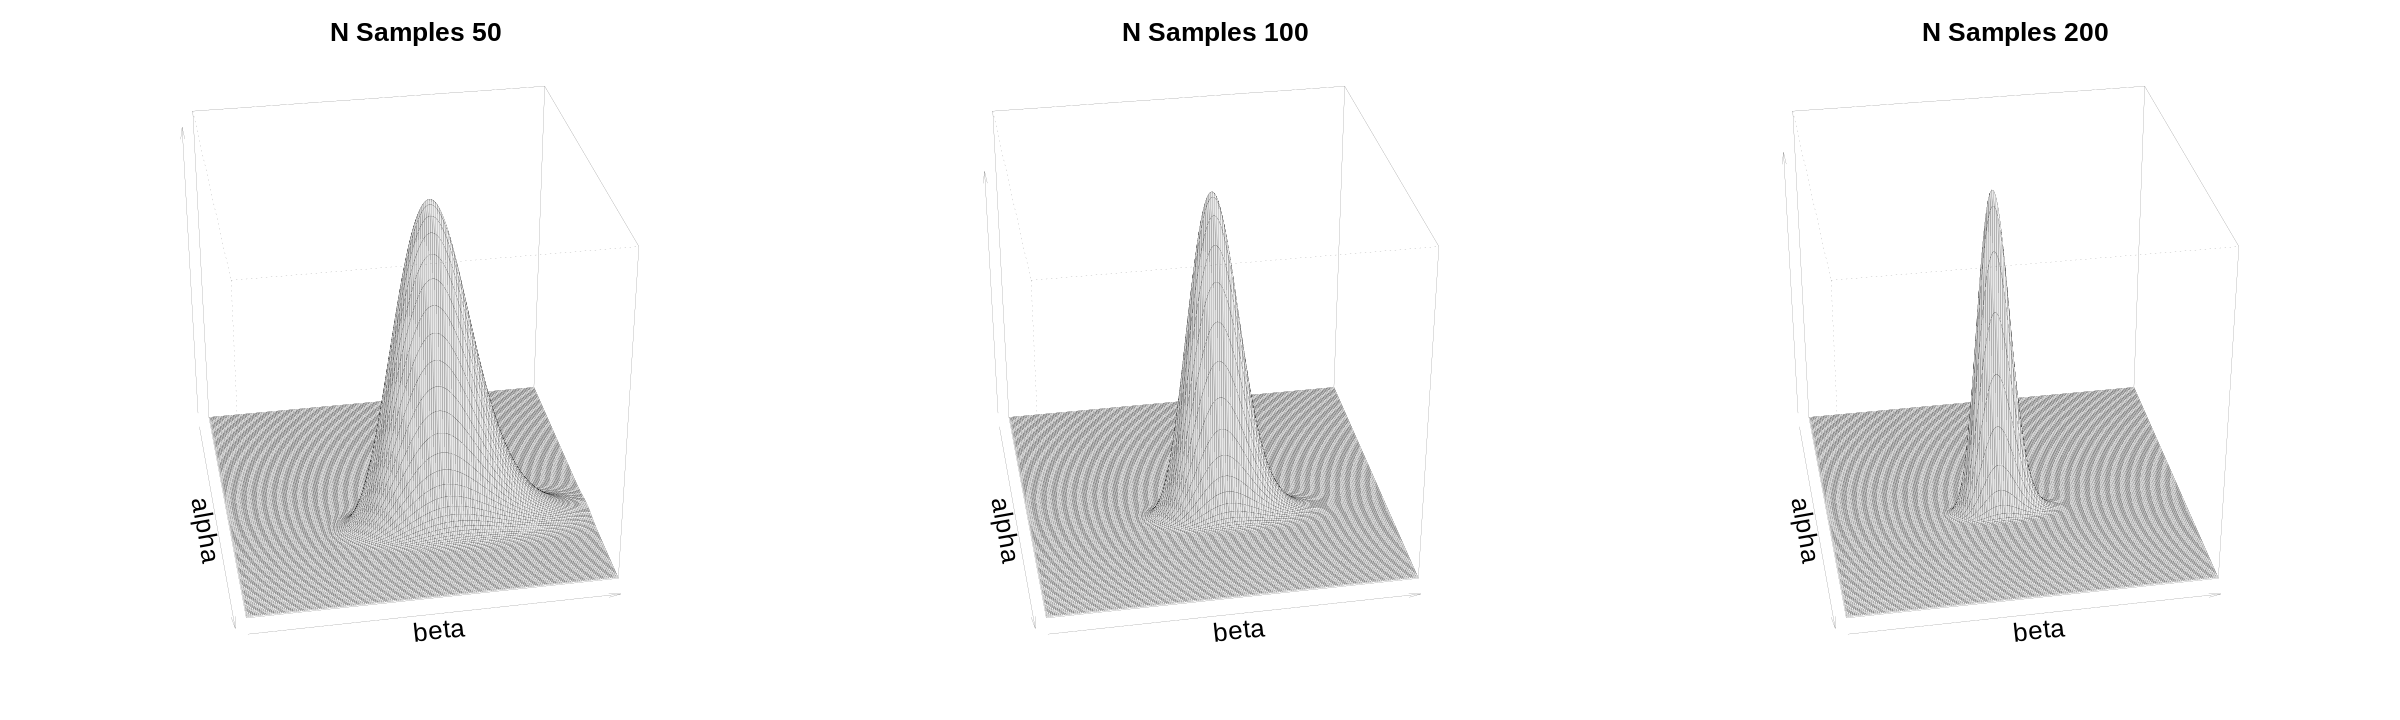

In [5]:
n.sample <- 200
x.min <- -6; x.max <- +6
h <- (x.max - x.min)/n.sample
alpha <- seq(from=x.min, by=h, length.out=n.sample)
beta <- seq(from=0.01, to=4, length.out=n.sample)
beta.s = 2
alpha.s = 1
theta <- runif(n.sample, -pi/2, pi/2)
x <- alpha.s + beta.s*tan(theta)   

par(mfrow=c(1, 3))
options(repr.plot.width = 20, repr.plot.height = 6) 
results <- data.frame()

n.plot <- c(1,10,20,50,100,200)
for(k in n.plot) {
    
    dx <- x[1:k]
 
    p.log.like <- function(a, b, data) {
    logL <- 0.0
    for (x in data) {
        logL <- logL  - log(b*(1 + ((x-a)/b)^2)/pi)
    }
     return(logL)
    }
    
    f <- function(a,b) {p.log.like(a, b, dx)}

    y.log.star <- outer(alpha, beta, Vectorize(f))
    y.post.star <- exp(y.log.star)
    y.post <- y.post.star/(h*sum(y.post.star))
  
    grid_values <- matrix(y.post, nrow = length(alpha), ncol = length(beta))
  
    index.max <- c(which(grid_values == max(grid_values), arr.ind = TRUE))
    alpha.max <- alpha[index.max[1]]
    beta.max <- beta[index.max[2]]

    df <- data.frame(alpha.s,alpha.max, beta.s, beta.max)
    results <- rbind(results,df)
    

    persp(alpha, beta , grid_values,
      xlab="alpha", ylab="beta", zlab="", 
      main=paste("N Samples",k), cex=1, lwd=0.1, cex.main=2, cex.lab=2,
      xlim=c(x.min,x.max), ylim=c(0,4),
      theta=80, phi=30, d=5.0, shade=0.05)

}
    
 

In [6]:
results <- cbind(results, n.plot)
results

alpha.s,alpha.max,beta.s,beta.max,n.plot
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.92,2,0.010000,1
1,1.62,2,2.055126,10
1,1.98,2,2.155377,20
1,1.86,2,2.175427,50
1,1.26,2,2.035075,100
1,1.02,2,1.834573,200


In the table above there are reported the value of $\alpha$ (alpha.max) and $\beta$ (beta.max) that we obtain after the estimation of the posterior. As the number of samples increases we obtain more significant values of $\alpha$ and $\beta$, also with respect to the initial chosen one (alpha.s), (beta.s).

## Exercise 3

Given the Signal over Background example discussed last week, analyze and discuss the following cases.

## Change the resolution w

1. Vary the sampling resolution of used to generate the data, keeping the same sampling range xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
   - Change the resolution w={0.1,0.25,1,2,3}
   - Check the effect on the results

#### Signal+Background - data generation

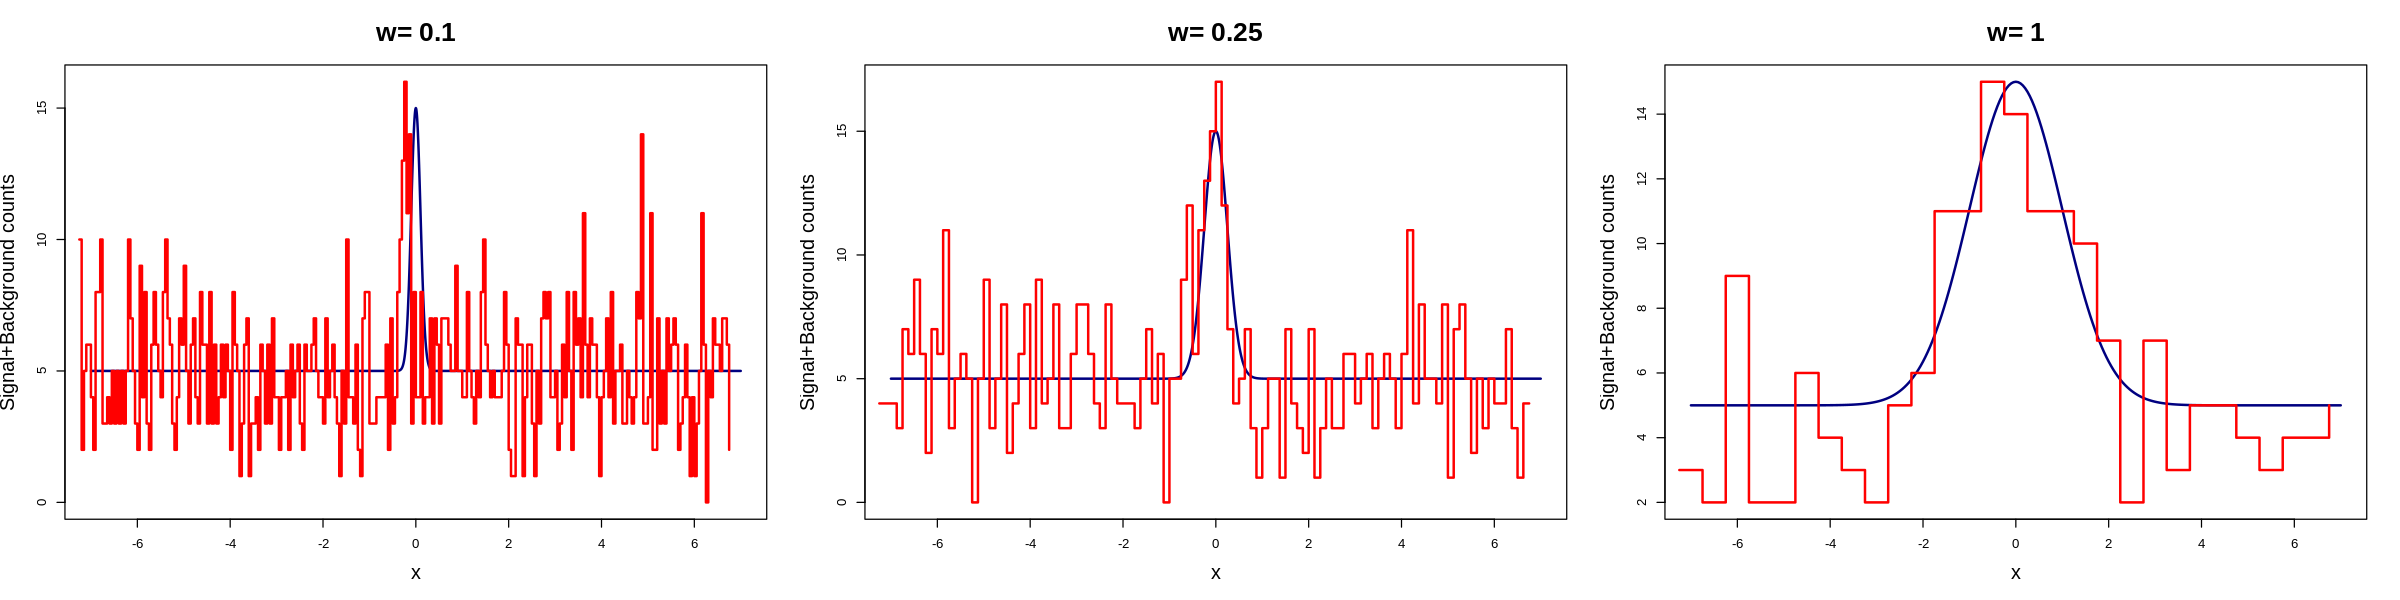

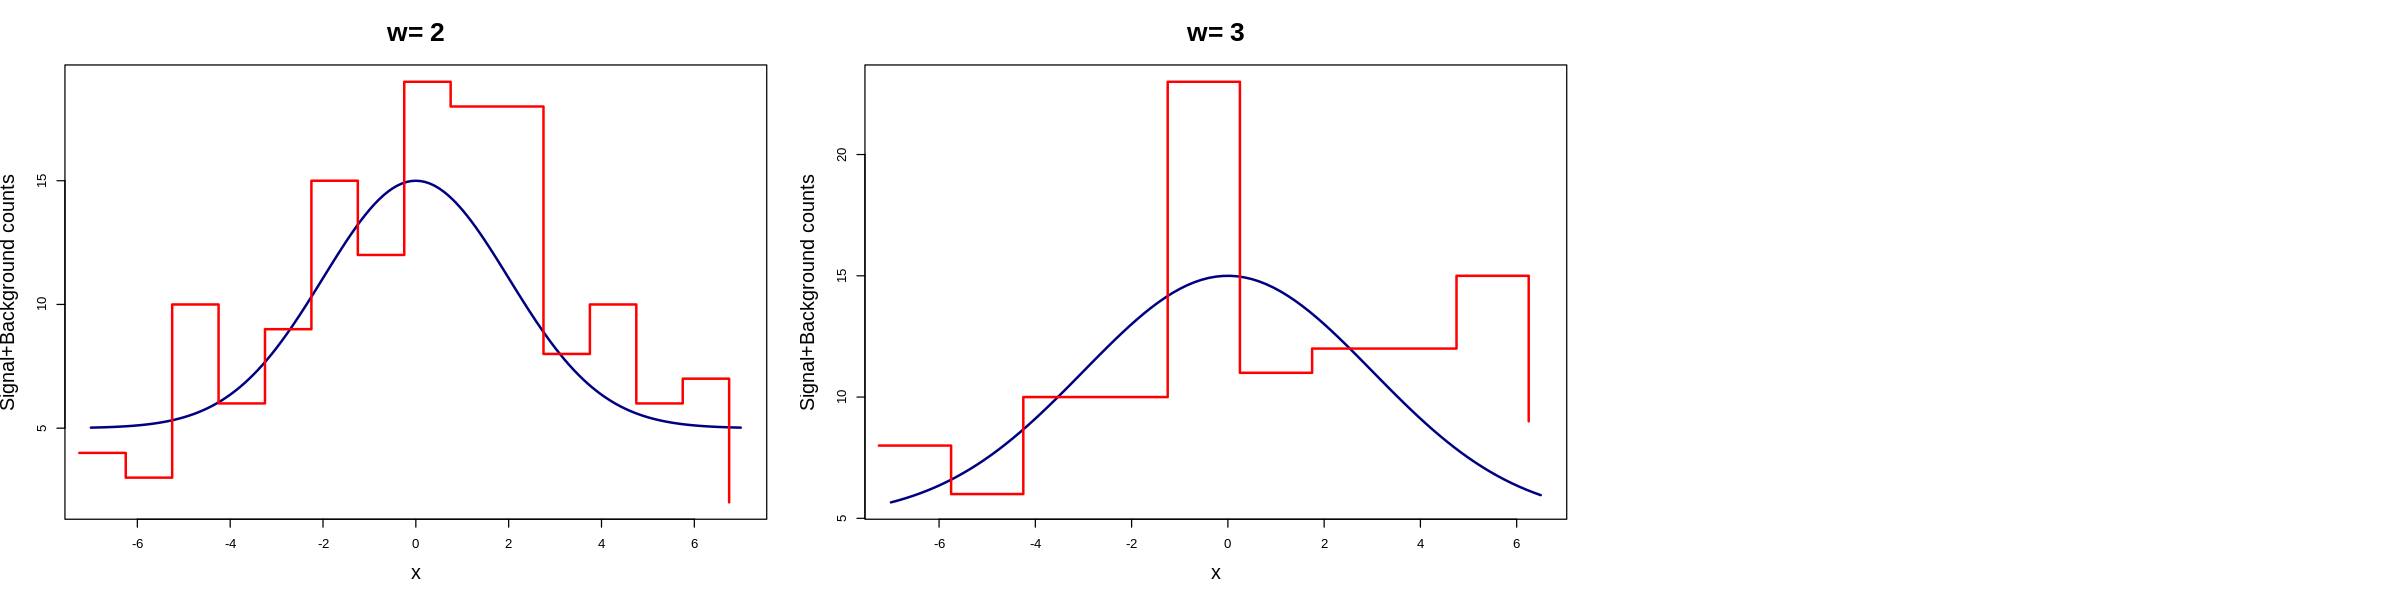

In [14]:
#-Generative model 
signal <-function(x, a, b, x0,w,t){
    t*(a*exp(-(x-x0)^2/(2*w^2)) + b)
}


#Define model parameters 
x0 <-0             #Signalpeak
w.samp <-1         #Signalwidth
A.true  <-2        #Signal amplitude
B.true  <-1        #Background amplitude 
Delta.t <-5        #Exposuretime

w.vec=c(0.1,0.25,1,2,3) 

#-Generate the observed data
set.seed(205)

options(repr.plot.width = 20, repr.plot.height = 5) 
par(mfrow=c(1,3))

for (w in w.vec){
    xdat  <-seq(from=-7*w.samp, to=7*w.samp,by=0.5*w)
    s.true <- signal(xdat, A.true, B.true, x0,w,Delta.t)
    ddat  <-rpois(length(s.true), s.true)


    xplot <-seq(from=min(xdat), to=max(xdat),by=0.05*w)
    splot <- signal(xplot, A.true, B.true, x0, w , Delta.t)
    plot(xplot, splot,type="l", lwd=2, col="navy", xlab="x",ylab="Signal+Background counts", 
         ylim=range(c(splot, ddat)), main=paste("w=",w), cex.main=2, cex.lab=1.5, cex=2) 

    #par(new=TRUE)
    xdat.off<- xdat-0.25
    lines(xdat.off,ddat,type="s",col="red",lwd=2,xlim=range(xplot), ylim=range(c(splot, ddat)),
         xlab="x",ylab="Signal+Background counts",)
}




As we can see from the plots above with a higher sampling resolution (w=0.1) we sample more frequently and therefore have more information about the signal and the background noise. 


#### Signal+Background - marginalization

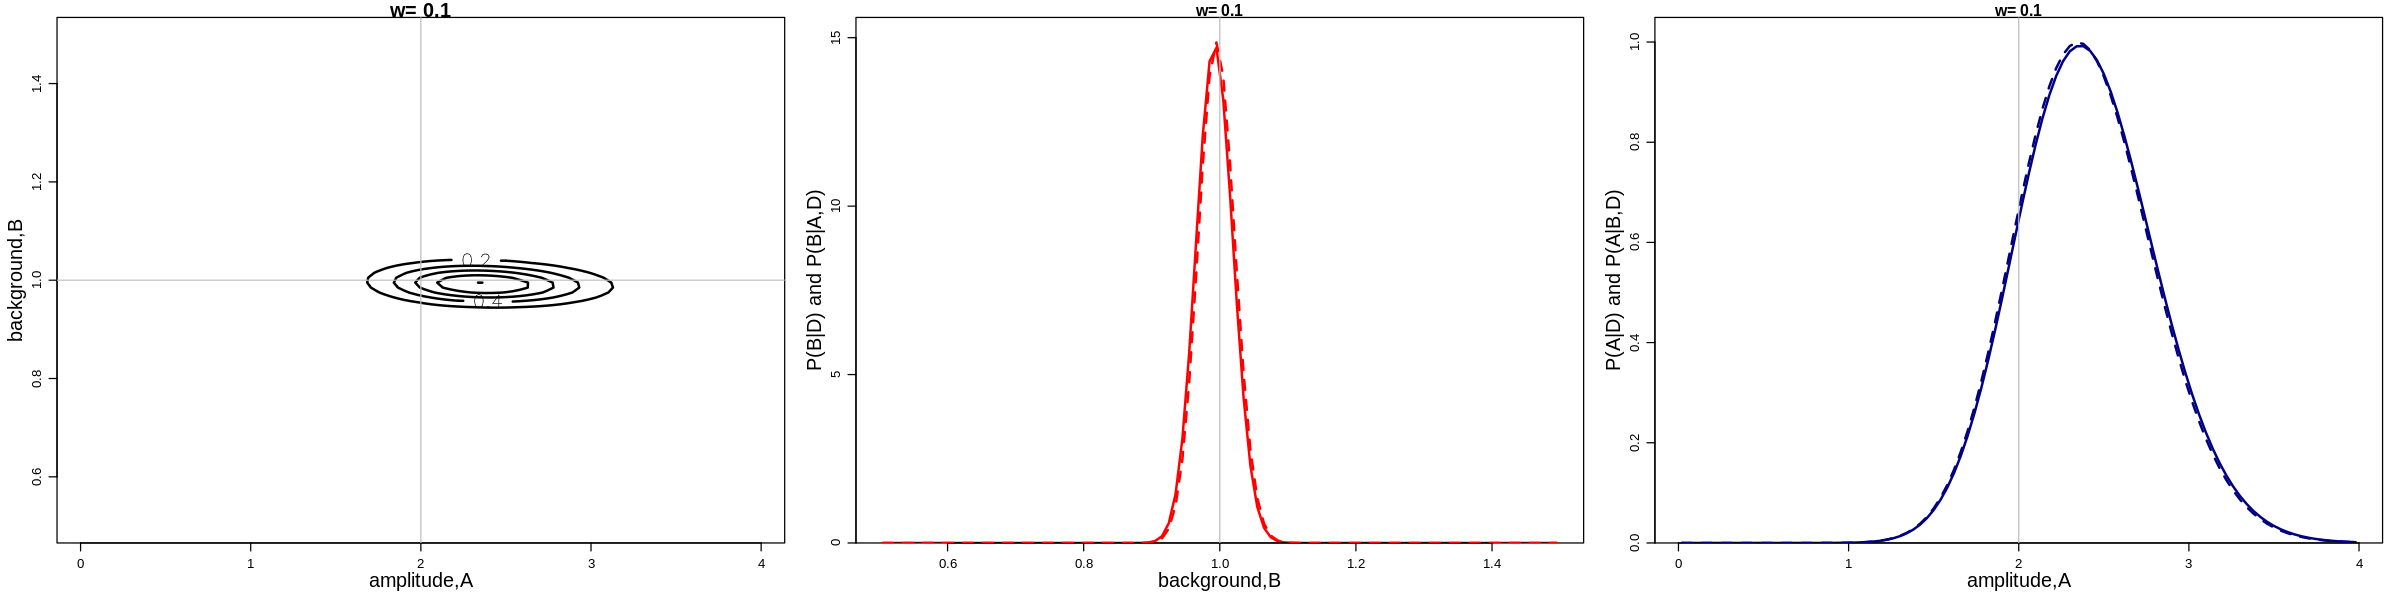

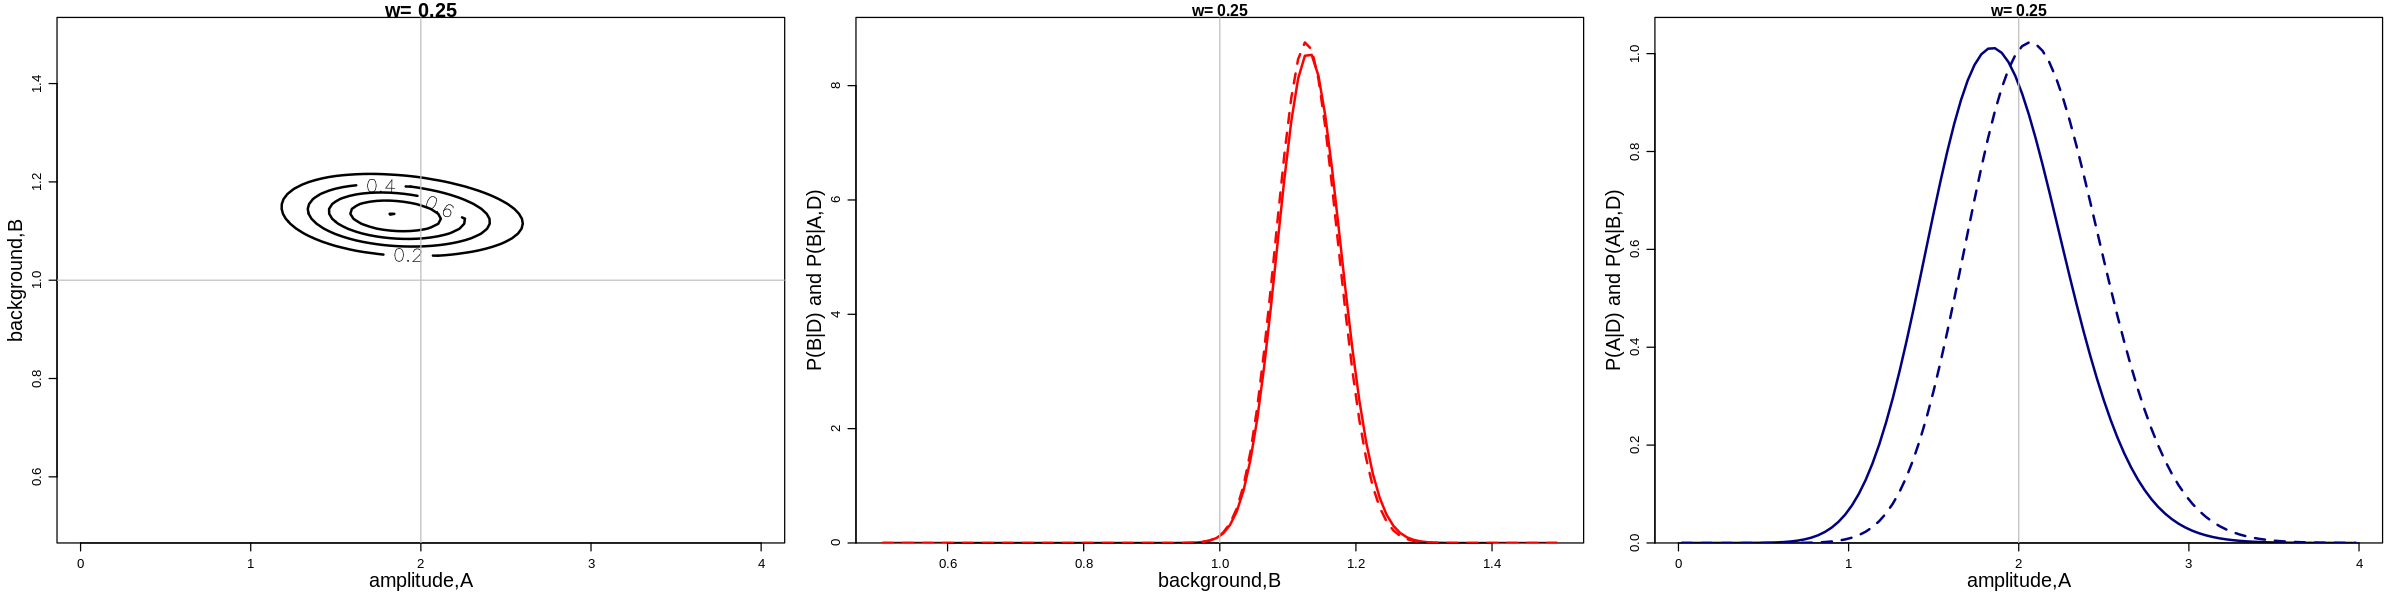

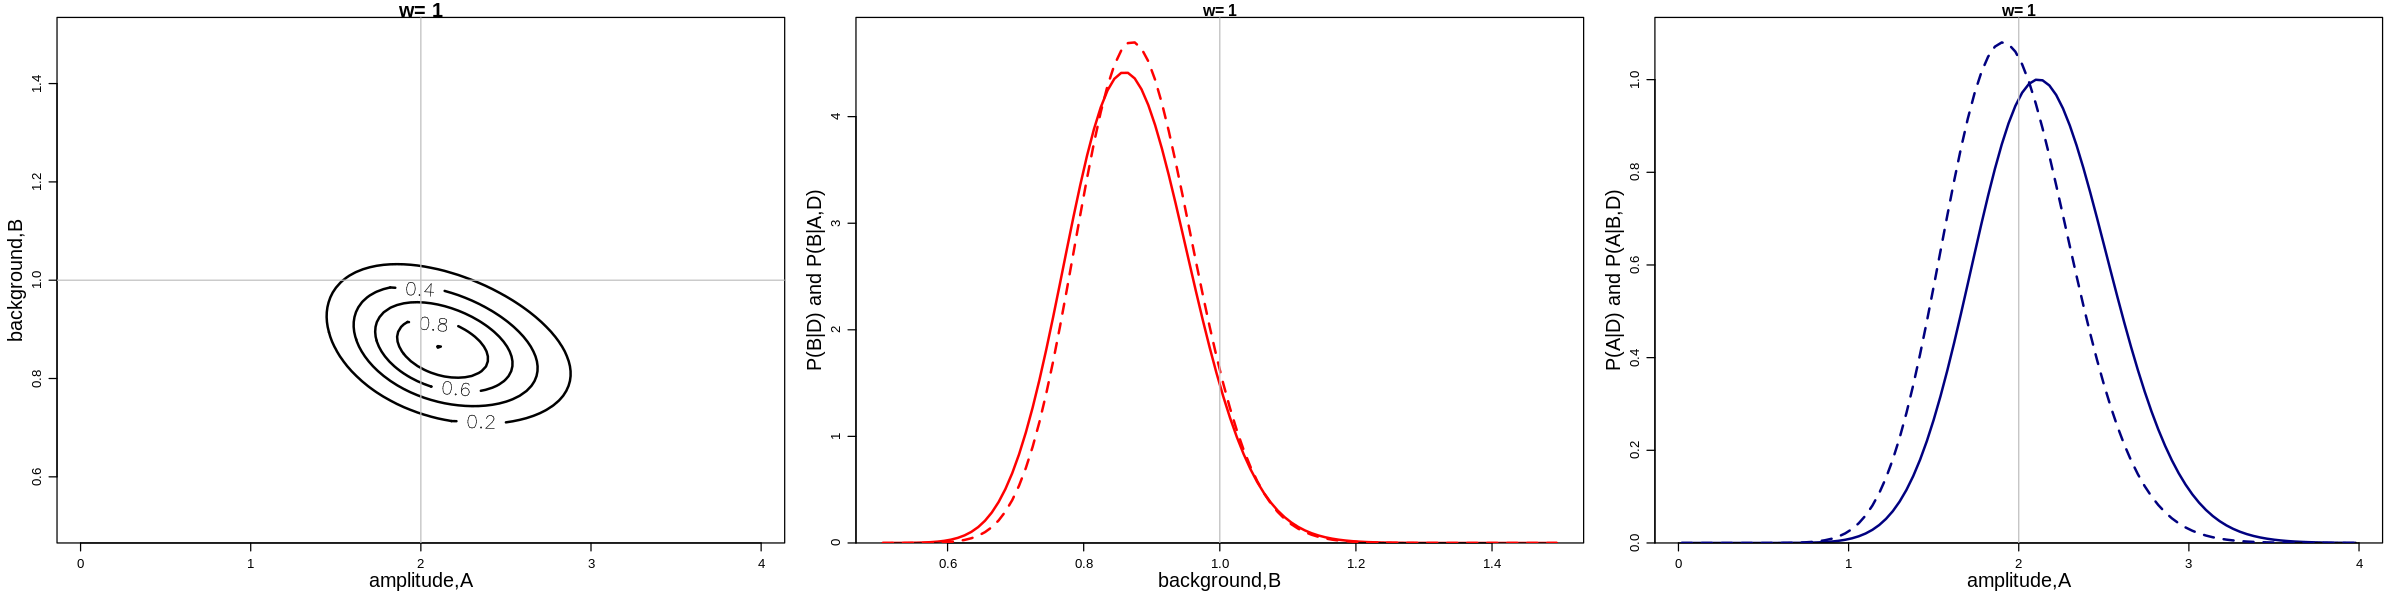

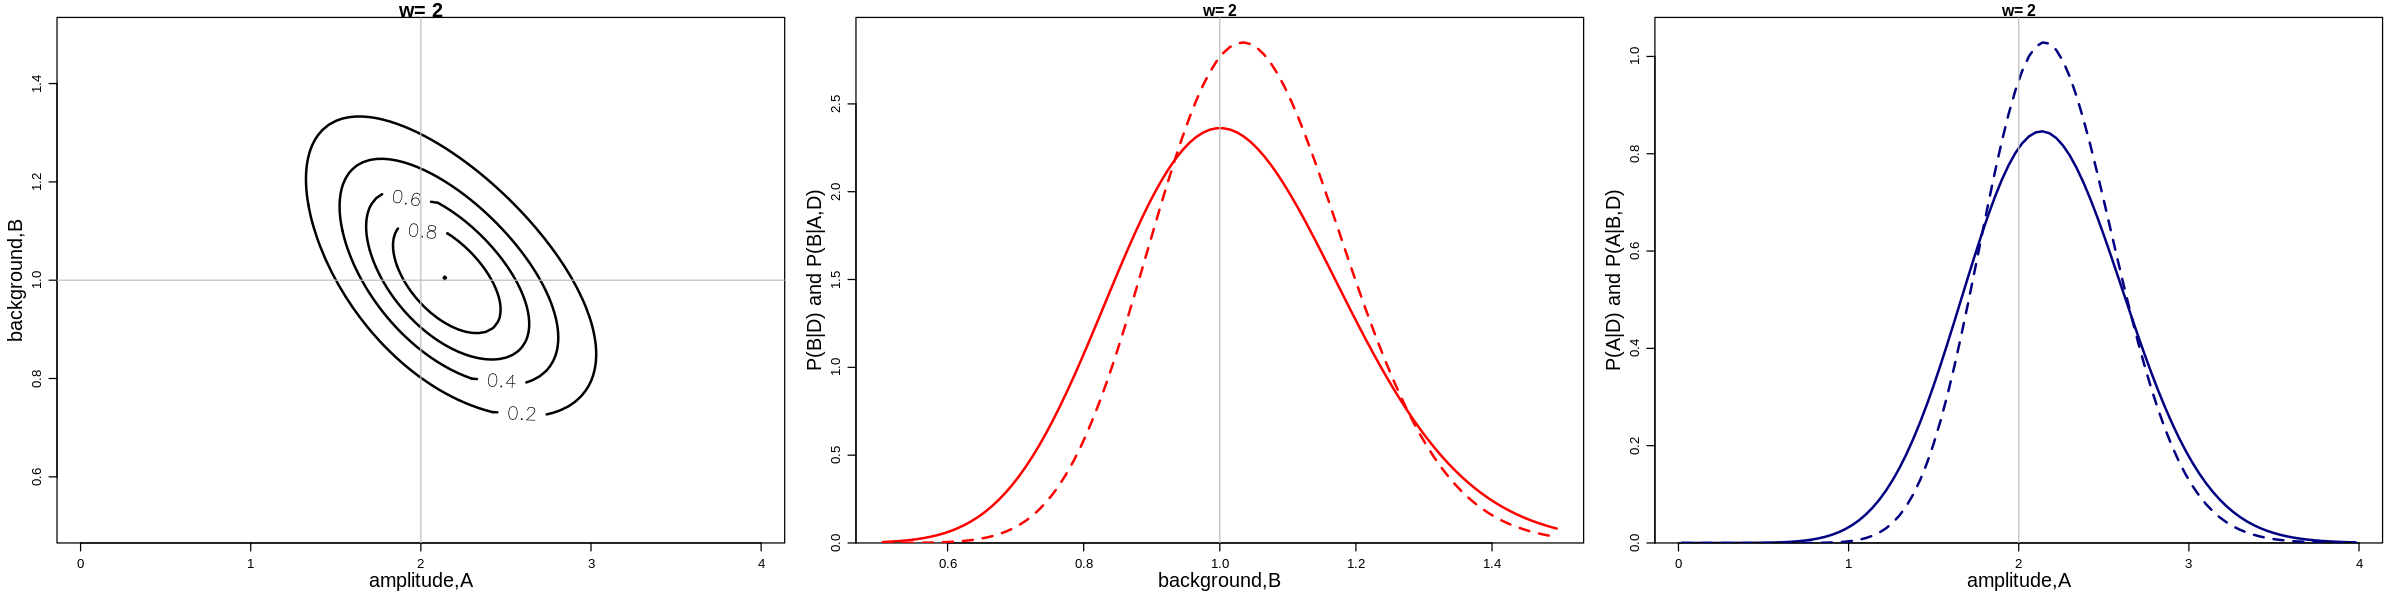

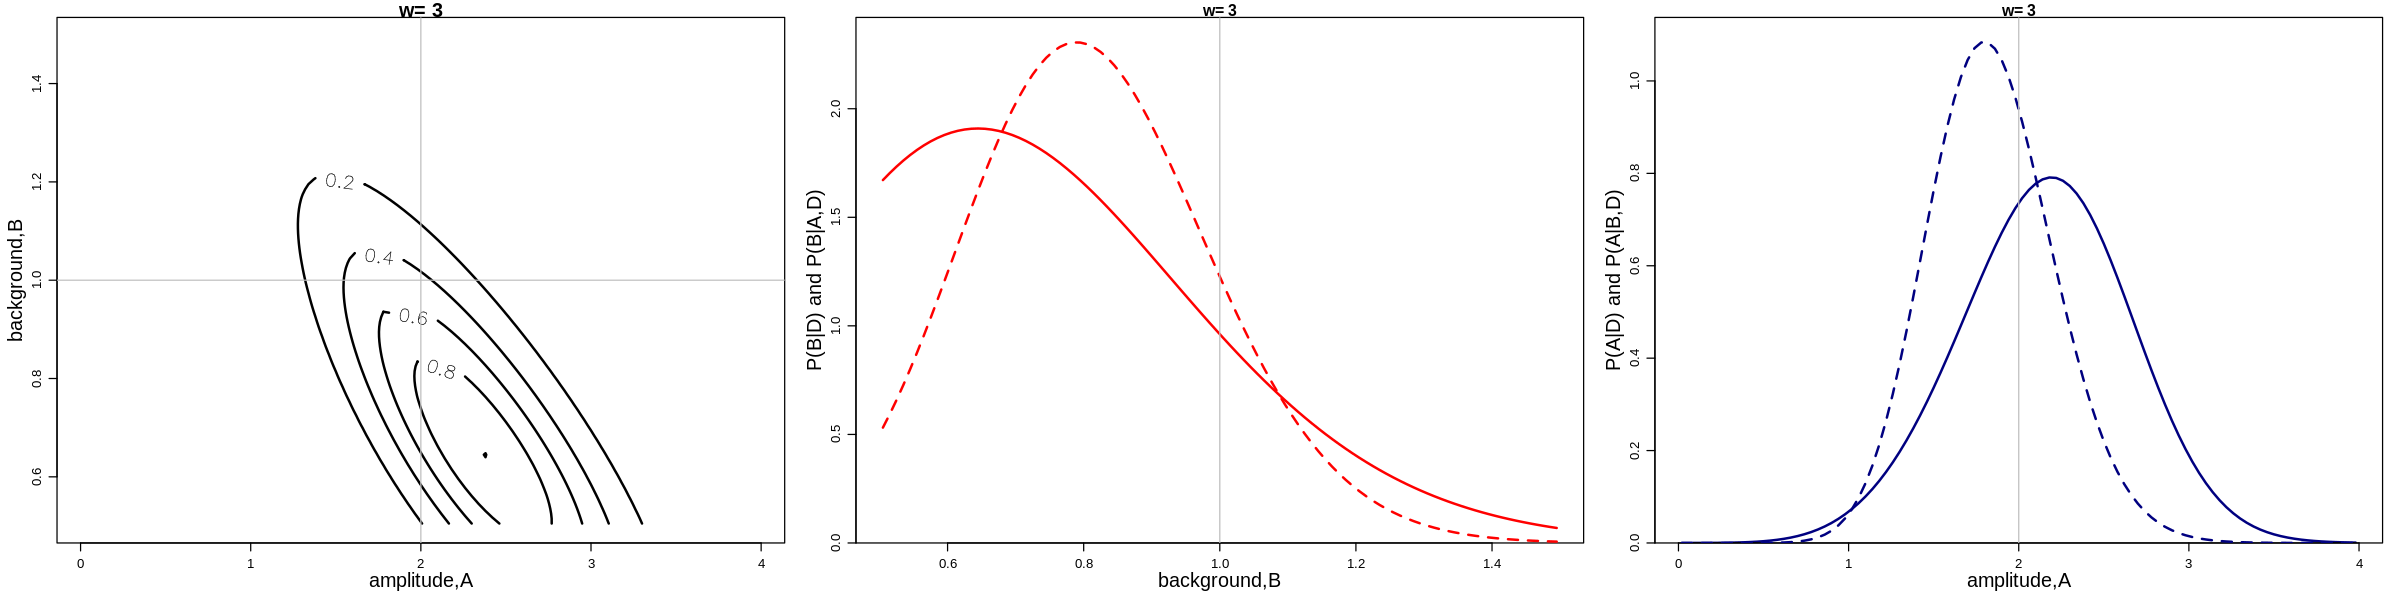

In [15]:
results <- data.frame()
par(mfrow=c(1,3), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
options(repr.plot.width = 20, repr.plot.height = 5) 


for (w in w.vec){
    
    xdat  <-seq(from=-7*w.samp, to=7*w.samp,by=0.5*w)
    s.true <- signal(xdat, A.true, B.true, x0,w,Delta.t)
    ddat  <-rpois(length(s.true), s.true)
    
    #-Sampling grid for computing posterior
    alim  <-c(0.0,4.0)
    blim  <-c(0.5,1.5)
    Nsamp <-100
    uniGrid <-seq(from=1/(2*Nsamp),to=1-1/(2*Nsamp),by=1/Nsamp)
    delta_a <-diff(alim)/Nsamp
    delta_b <-diff(blim)/Nsamp
    a<-alim[1]+diff(alim)*uniGrid
    b<-blim[1]+diff(blim)*uniGrid

    
    #Log posterior
    log.post <-function(d, x, a, b, x0,w,t){
        if(a<0|| b <0){return(-Inf)} #the effect of the prior
        sum(dpois(d, lambda=signal(x, a, b, x0,w,t),log=TRUE))
    }
    
    
    #Compute log unnormalized posterior, z=lnPˆ*(a,b|D),on a regular grid 
    z<-matrix(data=NA,nrow=length(a),ncol=length(b))
    for(j in 1:length(a)) {for(k in 1:length(b)) {
        z[j,k] <-log.post(ddat, xdat, a[j], b[k], x0,w,Delta.t)
        }
    }
    
    z<-z-max(z) #set maximum to zero
    
    #Plot unnormalized 2D posterior as contours
    contour(a, b,exp(z),
            nlevels=5,labcex =1,lwd =2,
            xlab="amplitude,A",ylab="background,B", cex.lab=1.5, main=paste("w=",w), cex.main=1.5)
            #xlim=c(A.true-2.5,A.true+2.5), ylim=c(1,1.9))
    abline(v=2,h=1,col="grey")

    
    #Compute normalized marginalized posteriors, P(a|D) and P(b|D)
    #by summing over other parameter.Normalize byg ridding.
    p_a_D<-apply(exp(z),1,sum)
    p_a_D<- p_a_D/(delta_a*sum(p_a_D))
    p_b_D<-apply(exp(z),2,sum)
    p_b_D<- p_b_D/(delta_b*sum(p_b_D))

    #Compute normalized conditional posteriors,P(a|b,D) and P(b|a,D)
    #using true values of conditioned parameters.Vectorize(func,par)
    #makes a vectorized function out of func in the parameter par.

    p_a_bD <-exp(Vectorize(log.post,"a")(ddat, xdat, a, B.true,x0,w,Delta.t))

    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <-exp(Vectorize(log.post,"b")(ddat, xdat, A.true, b,x0,w,Delta.t))

    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))

    #par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))


    #Plot the 1D marginalized posteriors

    plot(b, p_b_D,xlab="background,B",yaxs="i",ylim=1.05*c(0,max(p_b_D,p_b_aD)), main=paste("w=",w) , 
         ylab="P(B|D) and P(B|A,D)",type="l",lwd=2 , cex.lab=1.5, col="red")
    lines(b, p_b_aD, lwd=2,lty=2, col="red")
    abline(v=B.true,col="grey")

    plot(a, p_a_D,xlab="amplitude,A",yaxs="i",ylim=1.05*c(0,max(p_a_D,p_a_bD)), main=paste("w=",w) , 
         ylab="P(A|D) and P(A|B,D)",type="l",lwd=2, cex.lab=1.5, cex=1, col="navy")
    lines(a, p_a_bD, lwd=2,lty=2, col="navy")
    abline(v=A.true,col="grey")


    #Compute mean,standard deviation,covariance,correlation,of A and B 
    mean_a <- delta_a *sum(a * p_a_D)
    mean_b <- delta_b *sum(b * p_b_D)
    sd_a   <-sqrt(delta_a*sum((a-mean_a)^2*p_a_D))
    sd_b   <-sqrt(delta_b*sum((b-mean_b)^2*p_b_D))


    #Covariance normalization is performed with ’bruteforce’
    #The normalization constant is Z=delta_a*delta_b*sum(exp(z)).
    #This is independent of(a,b) so can be calculated out side of the loops.

    cov_ab <-0
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            cov_ab <-cov_ab + (a[j]-mean_a)*(b[k]-mean_b)*exp(z[j,k])
        }
    }

    cov_ab <-cov_ab /sum(exp(z))
    rho_ab <-cov_ab / (sd_a *sd_b)


    #cat("a=",mean_a,"+/-",sd_a,"\n")
    #cat("b=",mean_b,"+/-",sd_b,"\n")
    #cat("rho=",rho_ab,"\n")
    
    df <- data.frame(mean_a, sd_a, mean_b, sd_b, rho_ab)
    results <- rbind(results,df)
    cat("\n")
}


In [16]:
options(digits=3)
results

mean_a,sd_a,mean_b,sd_b,rho_ab
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.40,0.403,0.993,0.0270,-0.110
1.89,0.396,1.132,0.0465,-0.197
2.15,0.400,0.869,0.0907,-0.355
2.17,0.471,1.021,0.1663,-0.565
2.15,0.505,0.809,0.2142,-0.675


##  Changing  the ratio A/B used to simulate the data

2. Change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)  
   - Check the effect on the results

#### Signal+Background - data generation

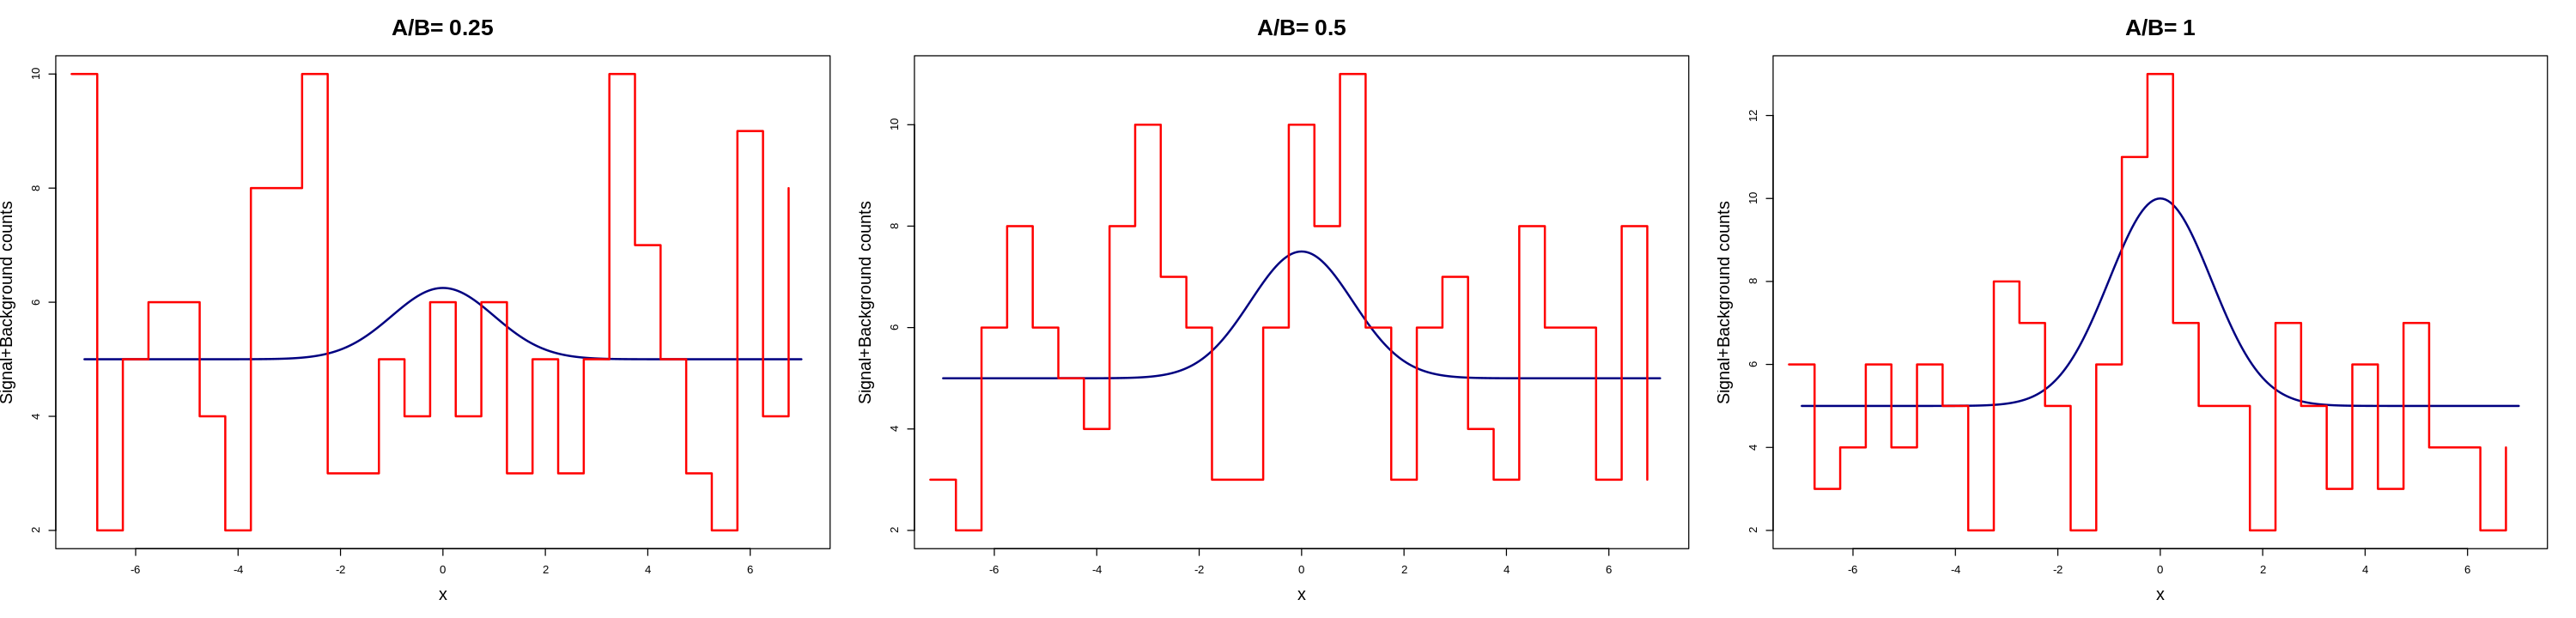

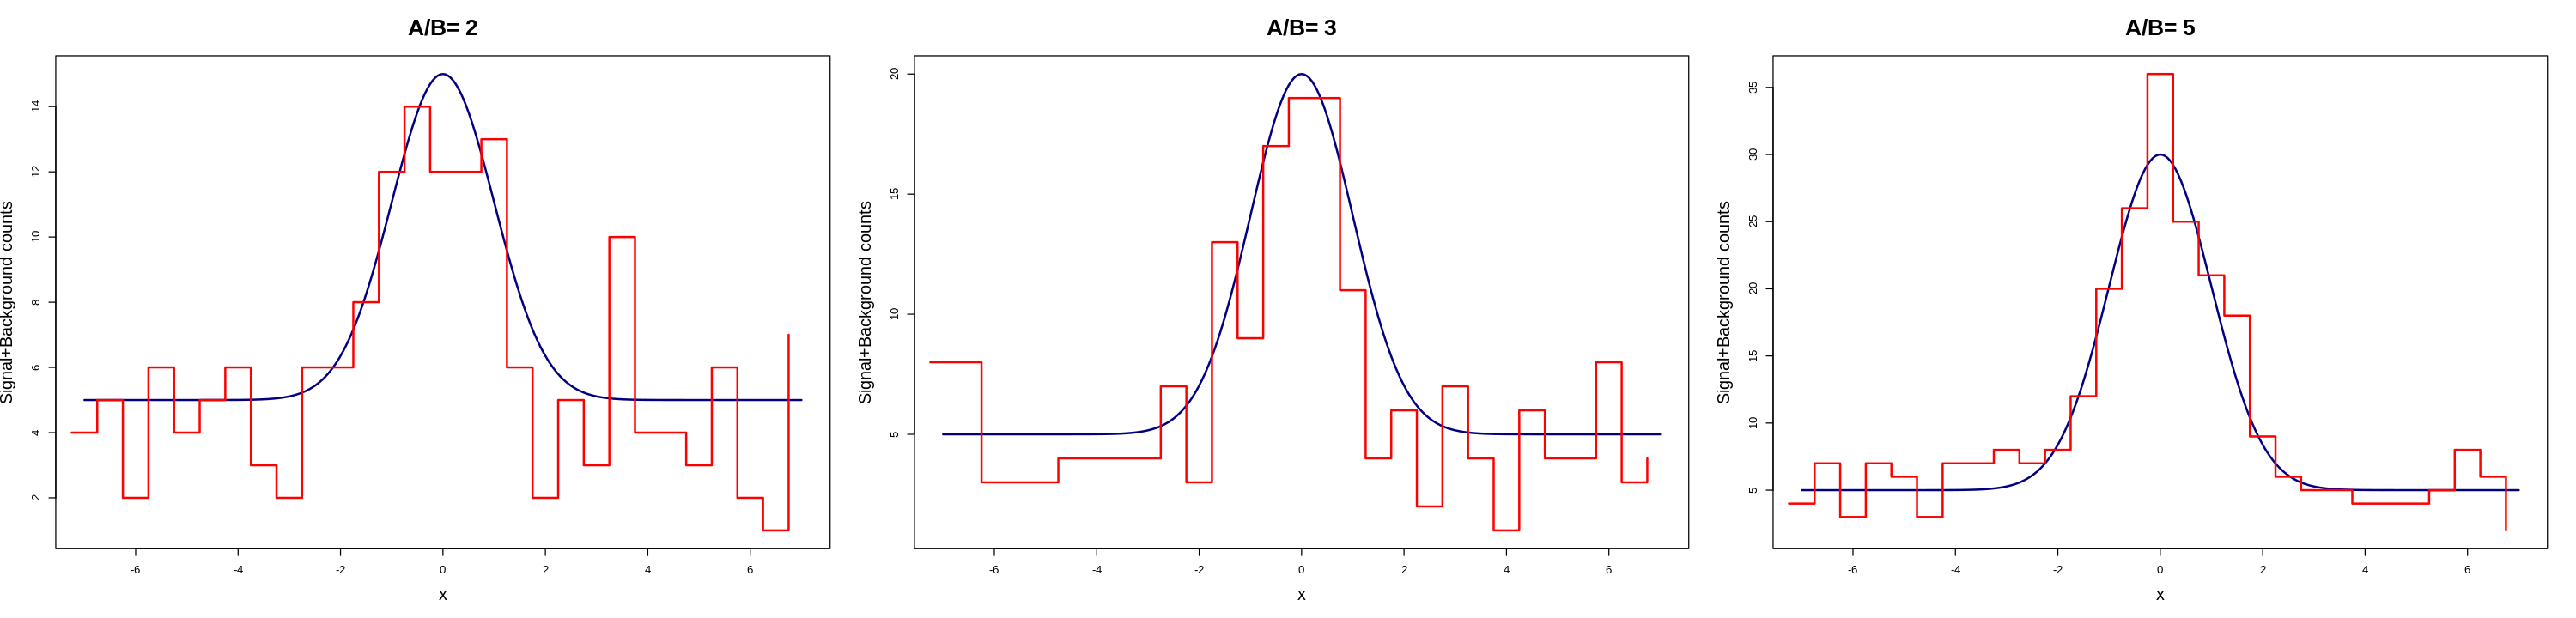

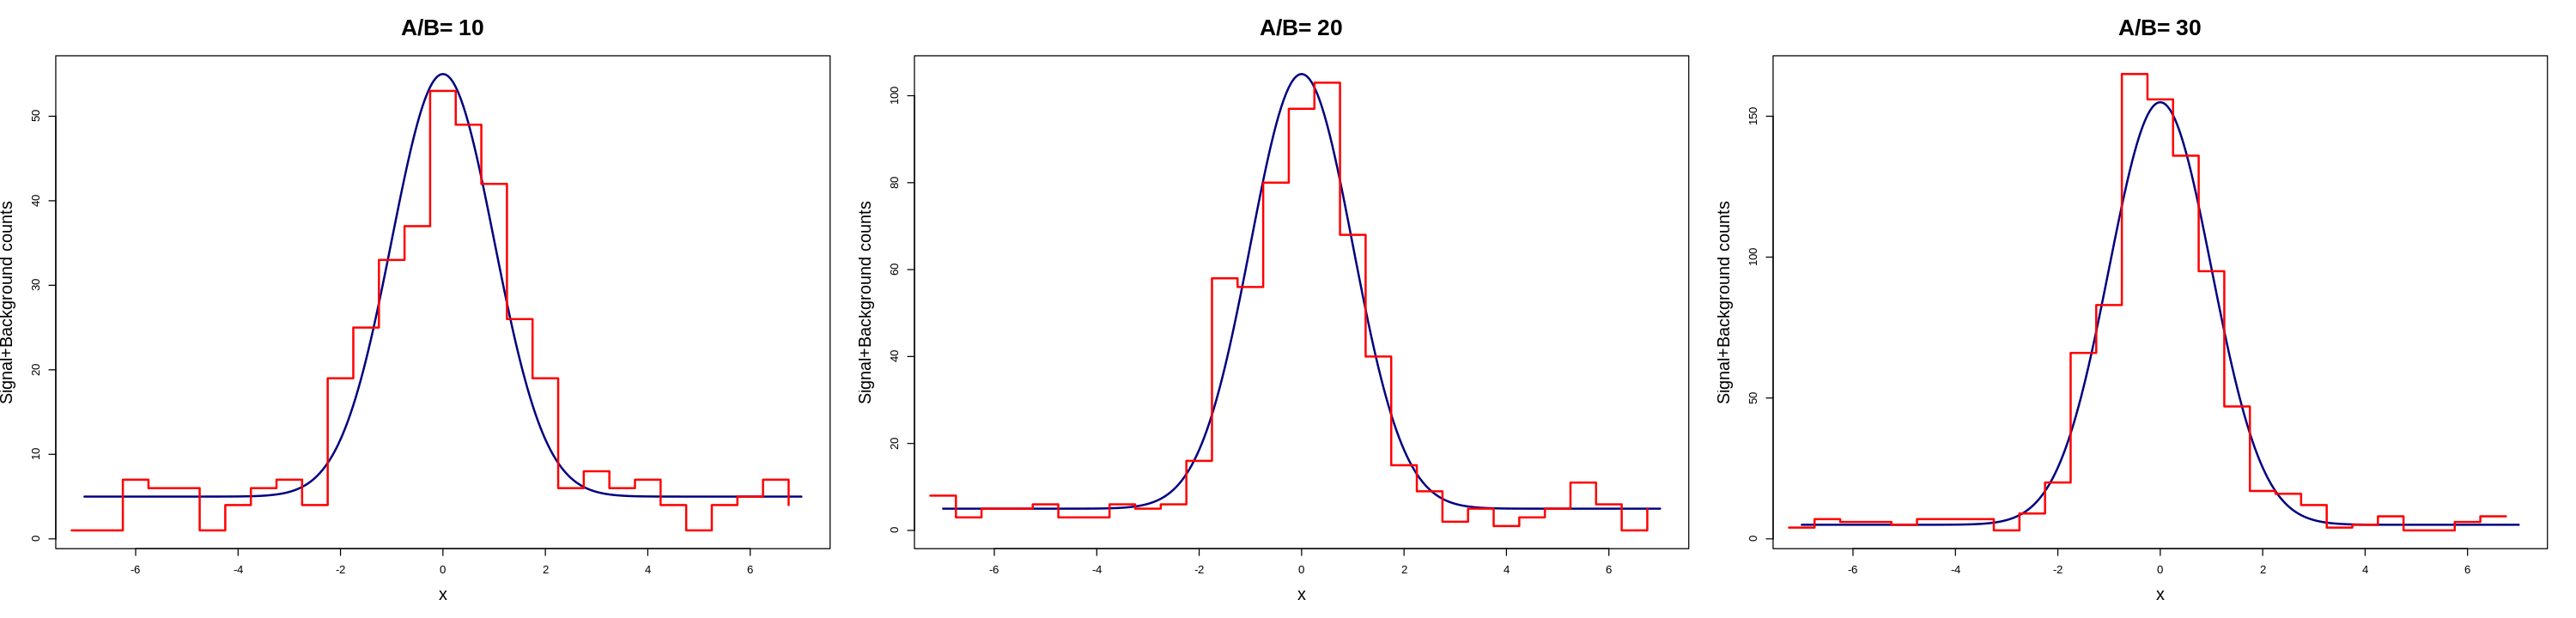

In [10]:
#-Generative model 
signal <-function(x, a, b, x0,w,t){
    t*(a*exp(-(x-x0)^2/(2*w^2)) + b)
}


#Define model parameters 
x0 <-0             #Signalpeak
w <-1              #Signalwidth
A.true  <-2        #Signal amplitude
B.true  <-1        #Background amplitude 
Delta.t <-5        #Exposuretime

a_vec=c(0.25,0.5,1,2,3,5,10,20,30)

#-Generate the observed data
set.seed(205)

options(repr.plot.width = 25, repr.plot.height = 6) 
par(mfrow=c(1,3))

for (A.true in a_vec){
    xdat  <-seq(from=-7*w.samp, to=7*w.samp,by=0.5*w)
    s.true <- signal(xdat, A.true, B.true, x0,w,Delta.t)
    ddat  <-rpois(length(s.true), s.true)


    #PLOT
    xplot <-seq(from=min(xdat), to=max(xdat),by=0.05*w)
    splot <- signal(xplot, A.true, B.true, x0, w , Delta.t)
    plot(xplot, splot,type="l", lwd=2, col="navy", xlab="x",ylab="Signal+Background counts", 
         ylim=range(c(splot, ddat)), main=paste("A/B=",A.true/B.true), cex.main=2, cex.lab=1.5, cex=2) 

    #par(new=TRUE)
    xdat.off<- xdat-0.25
    lines(xdat.off,ddat,type="s",col="red",lwd=2,xlim=range(xplot), ylim=range(c(splot, ddat)),
         xlab="x",ylab="Signal+Background counts",)
}



The plots above shows that with a lower SNR (A/B) the background dominates completely (red) over the signal (blue), as the amplitute of the signal is increased we have a more clear peak of the signal.

#### Signal+Background - marginalization

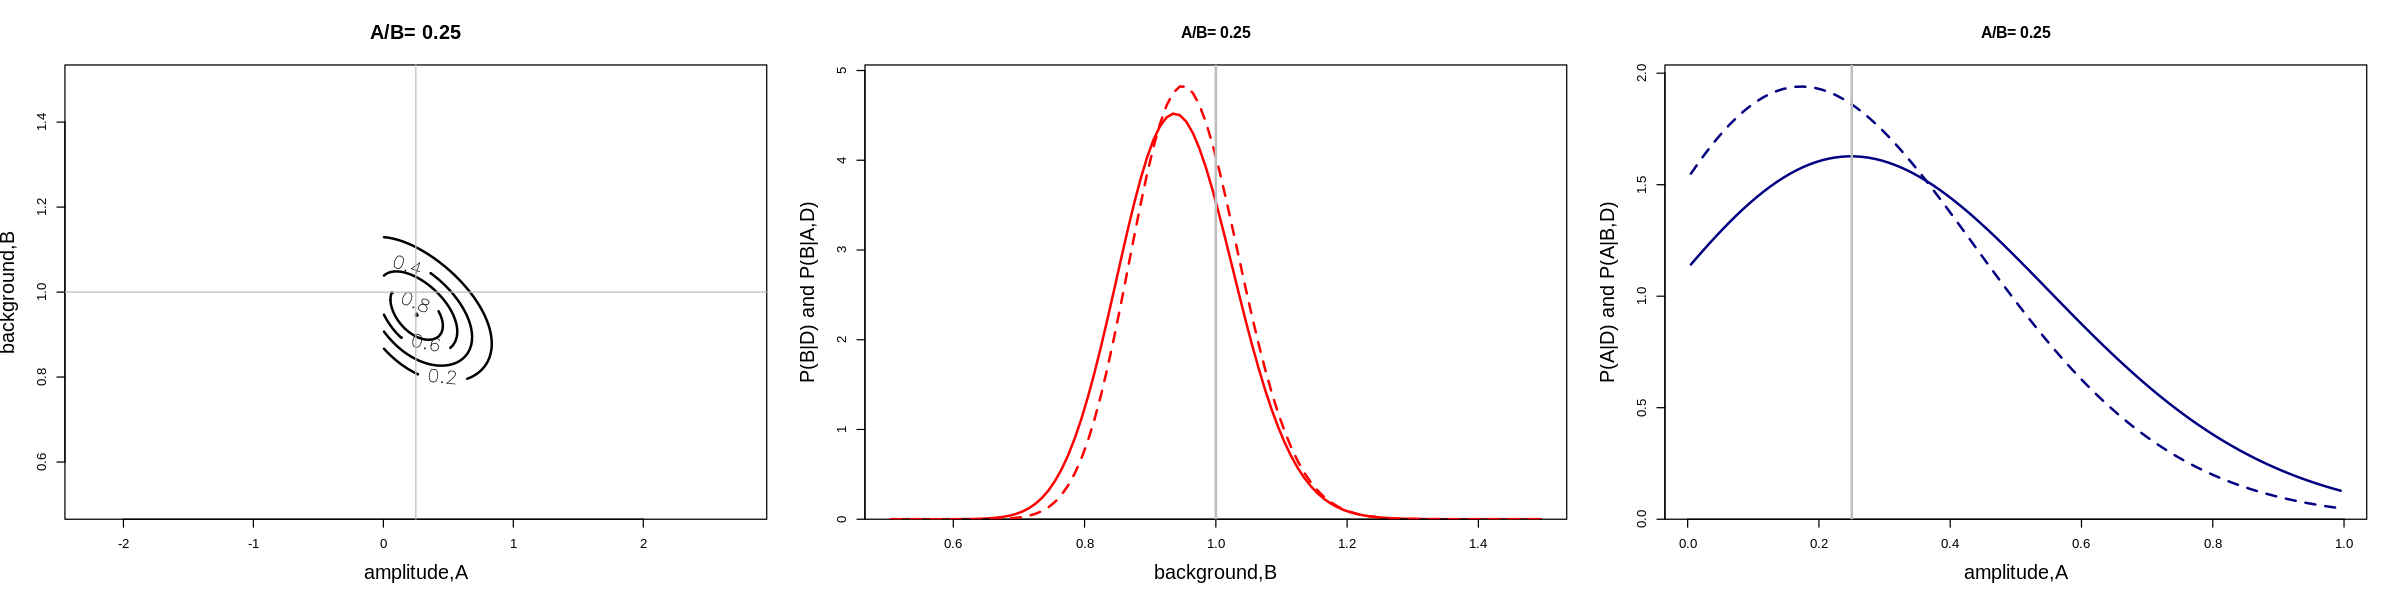

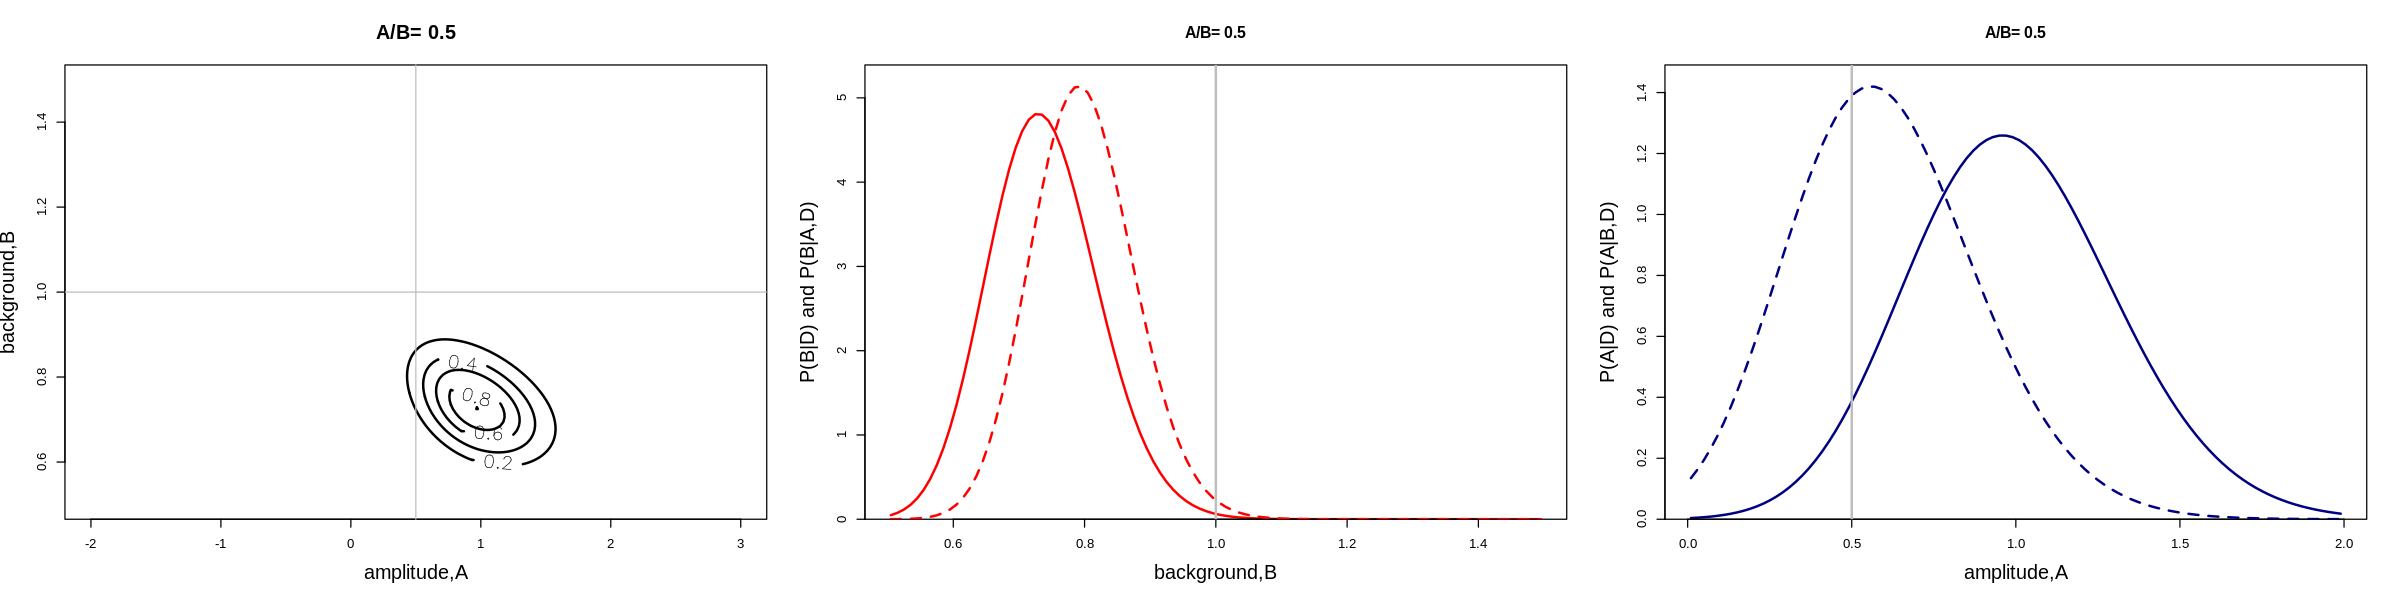

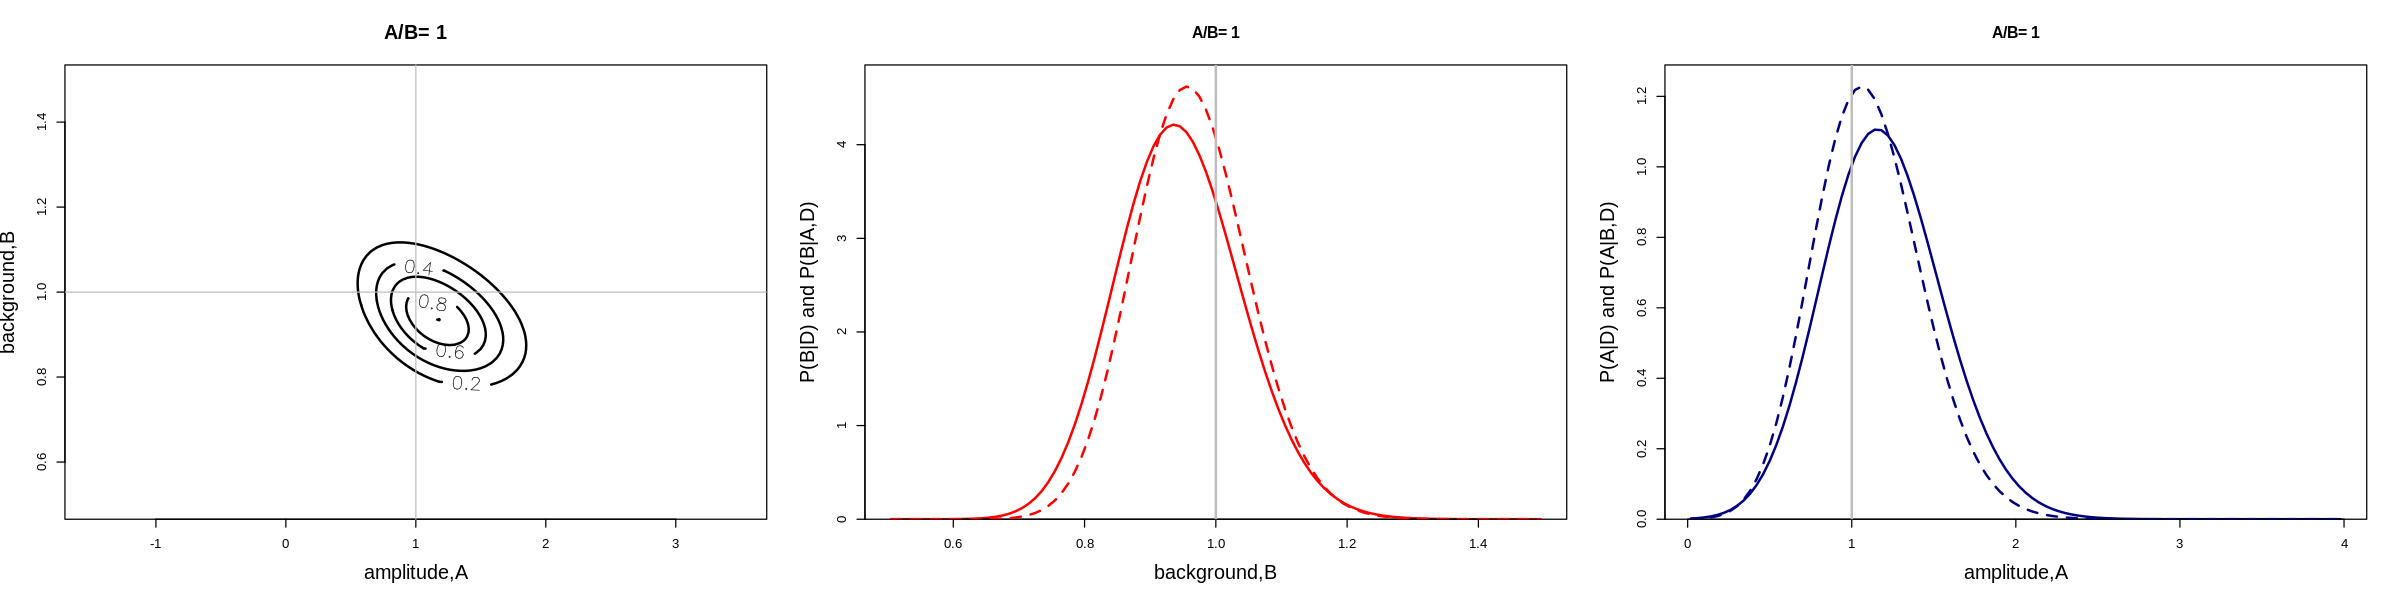

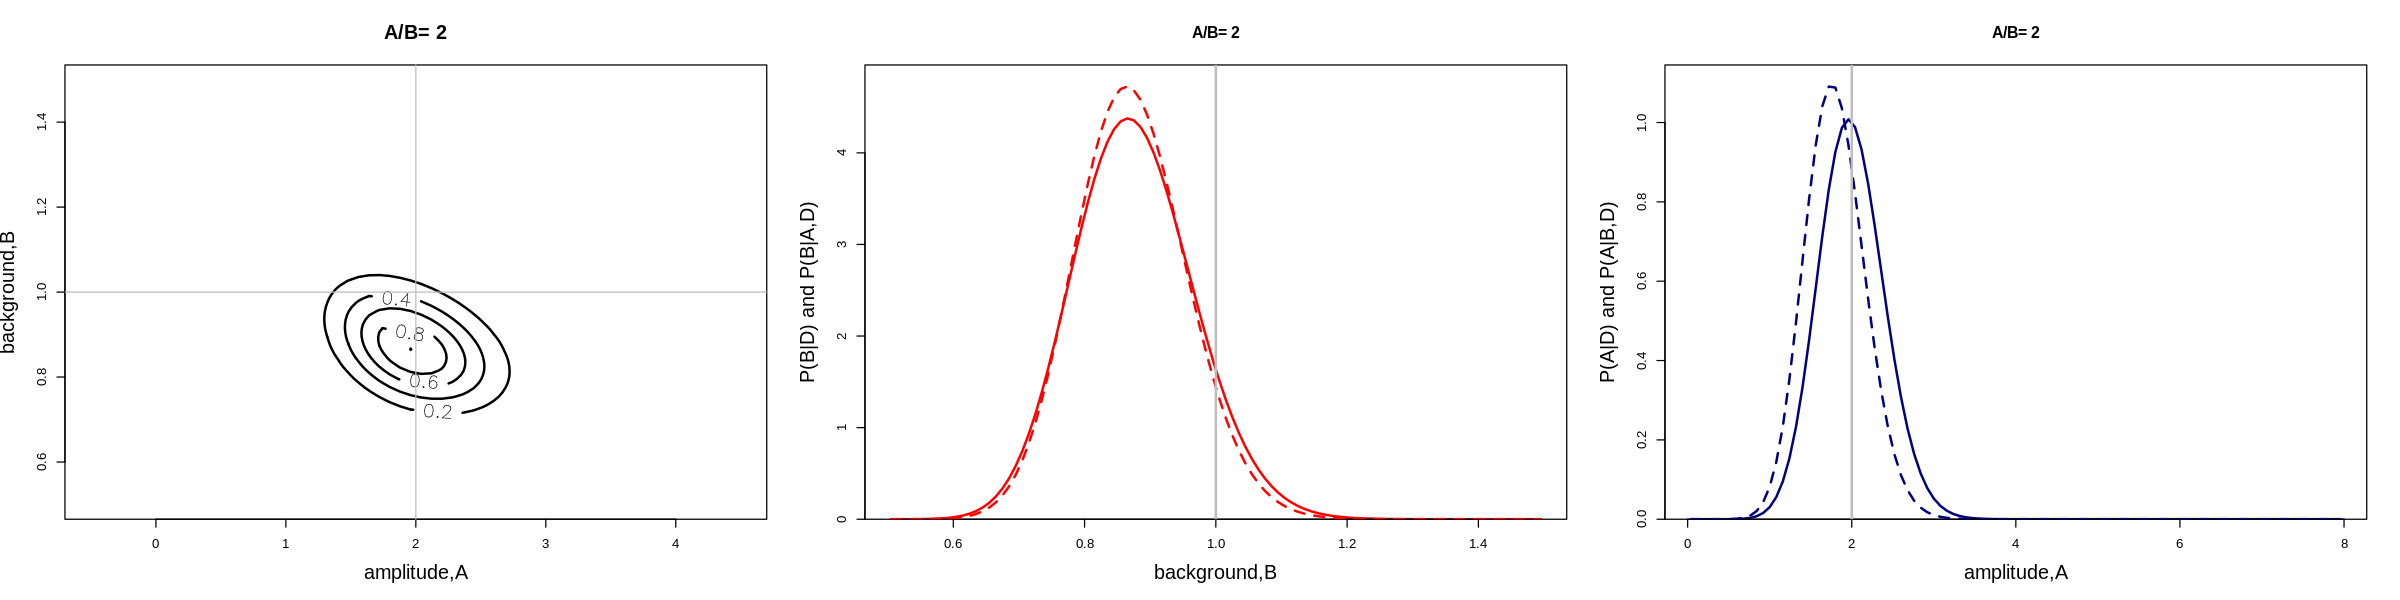

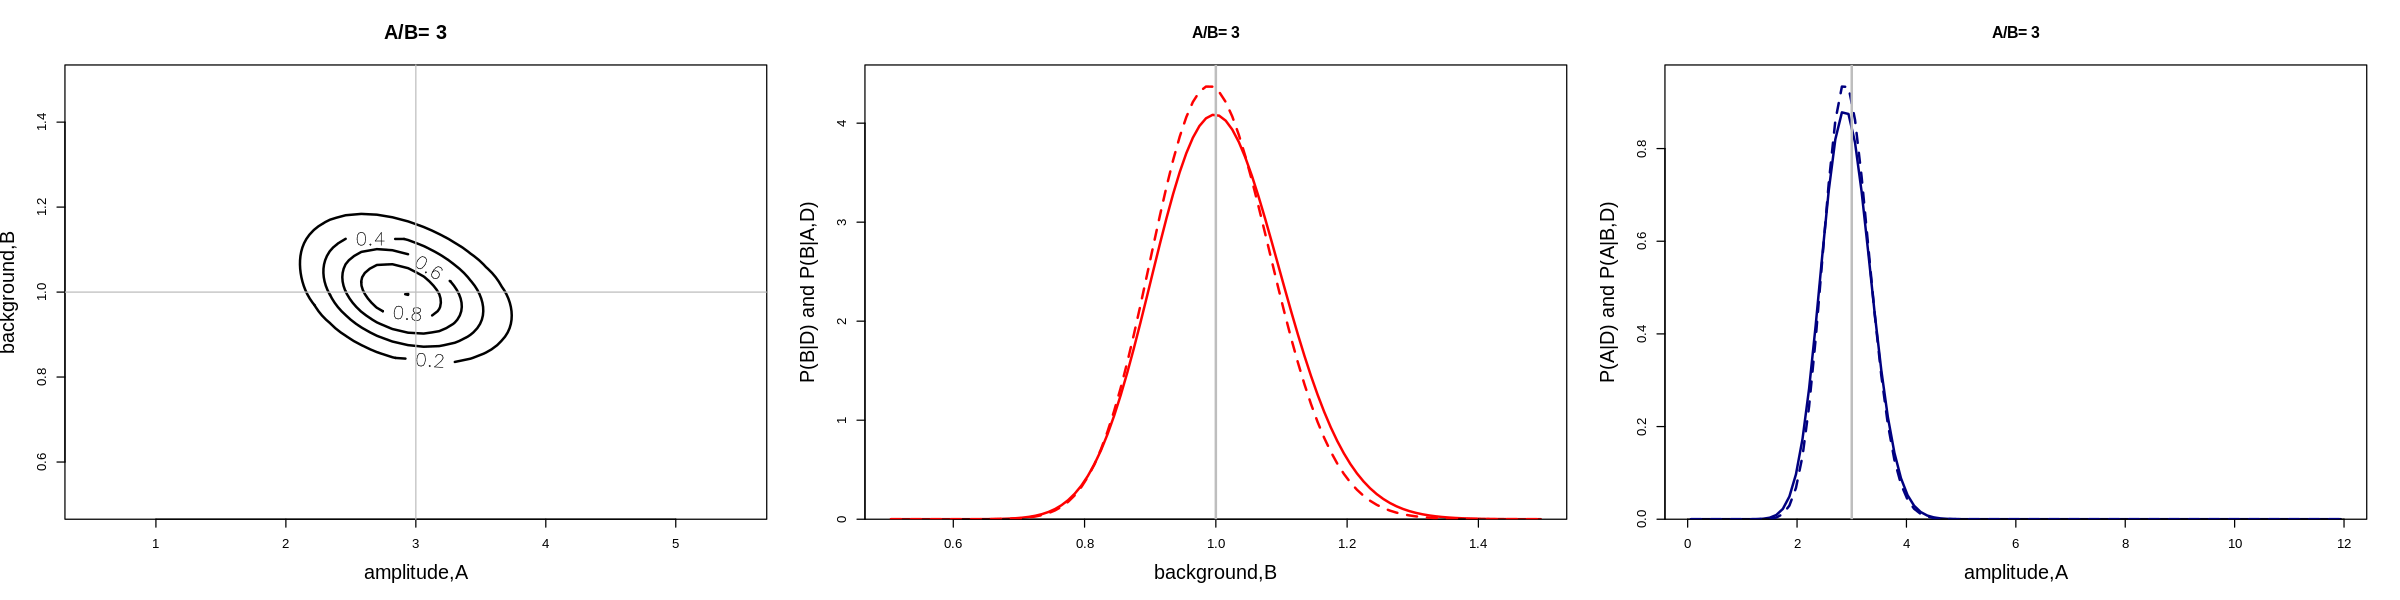

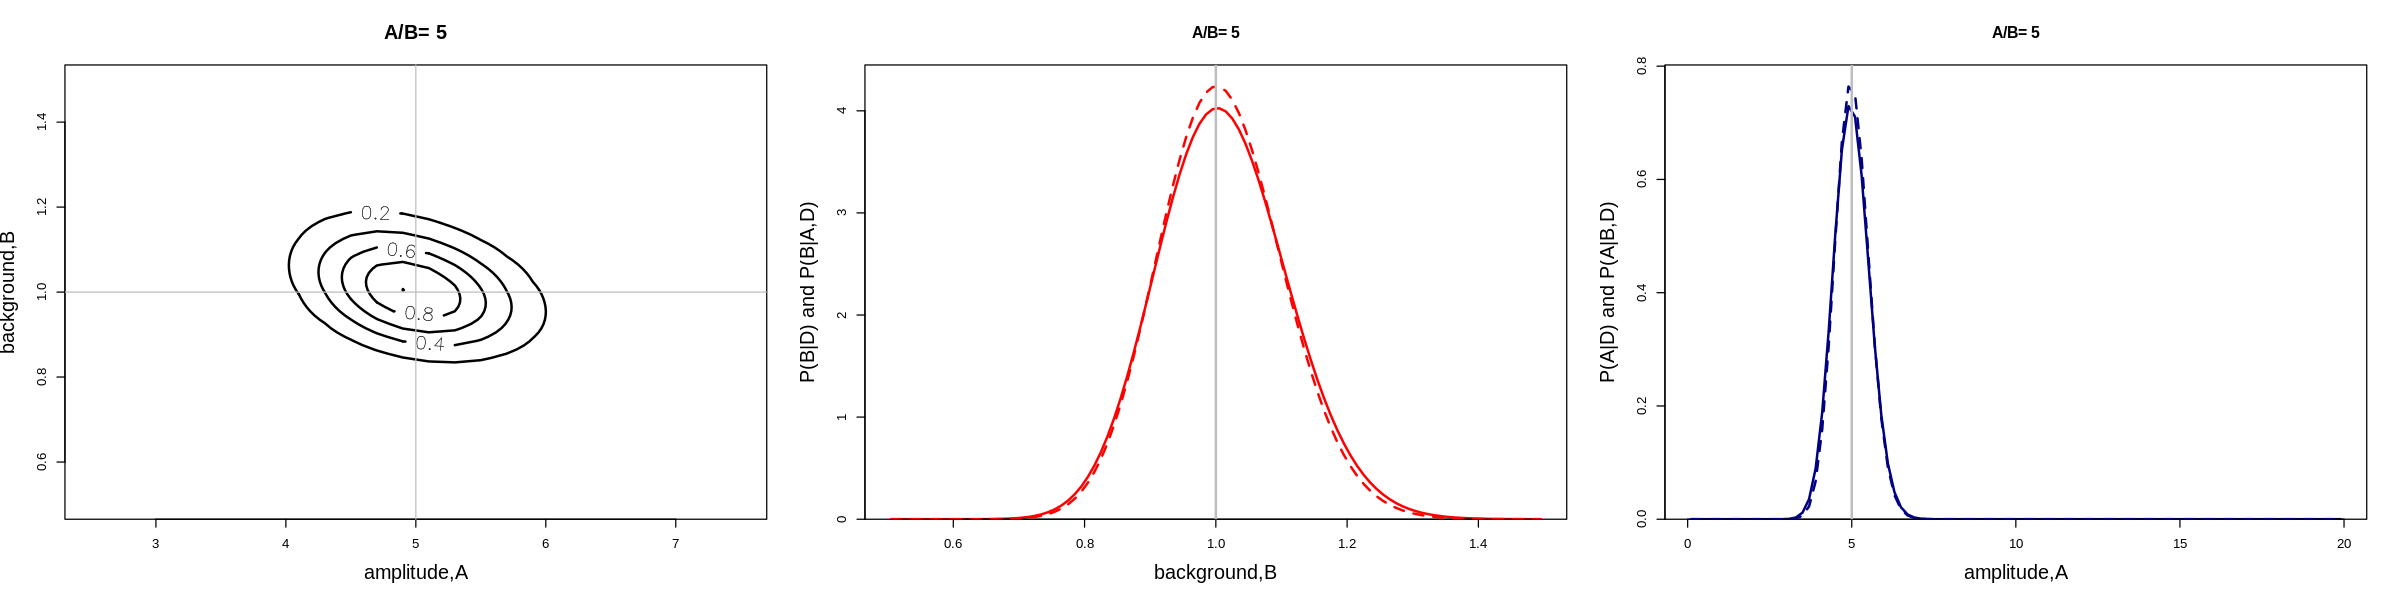

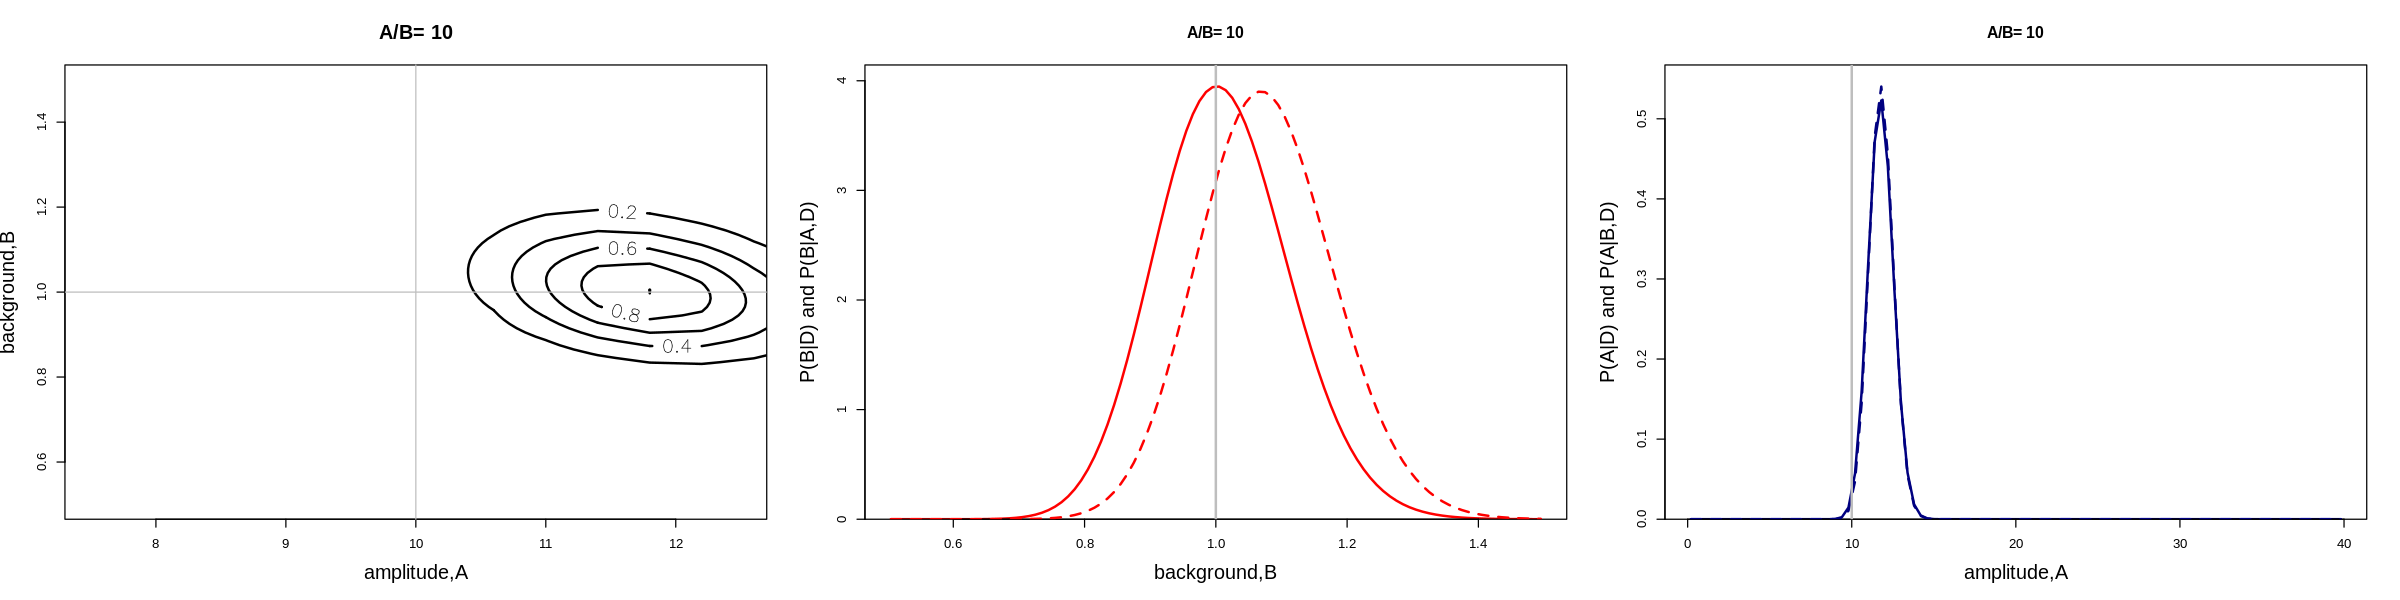

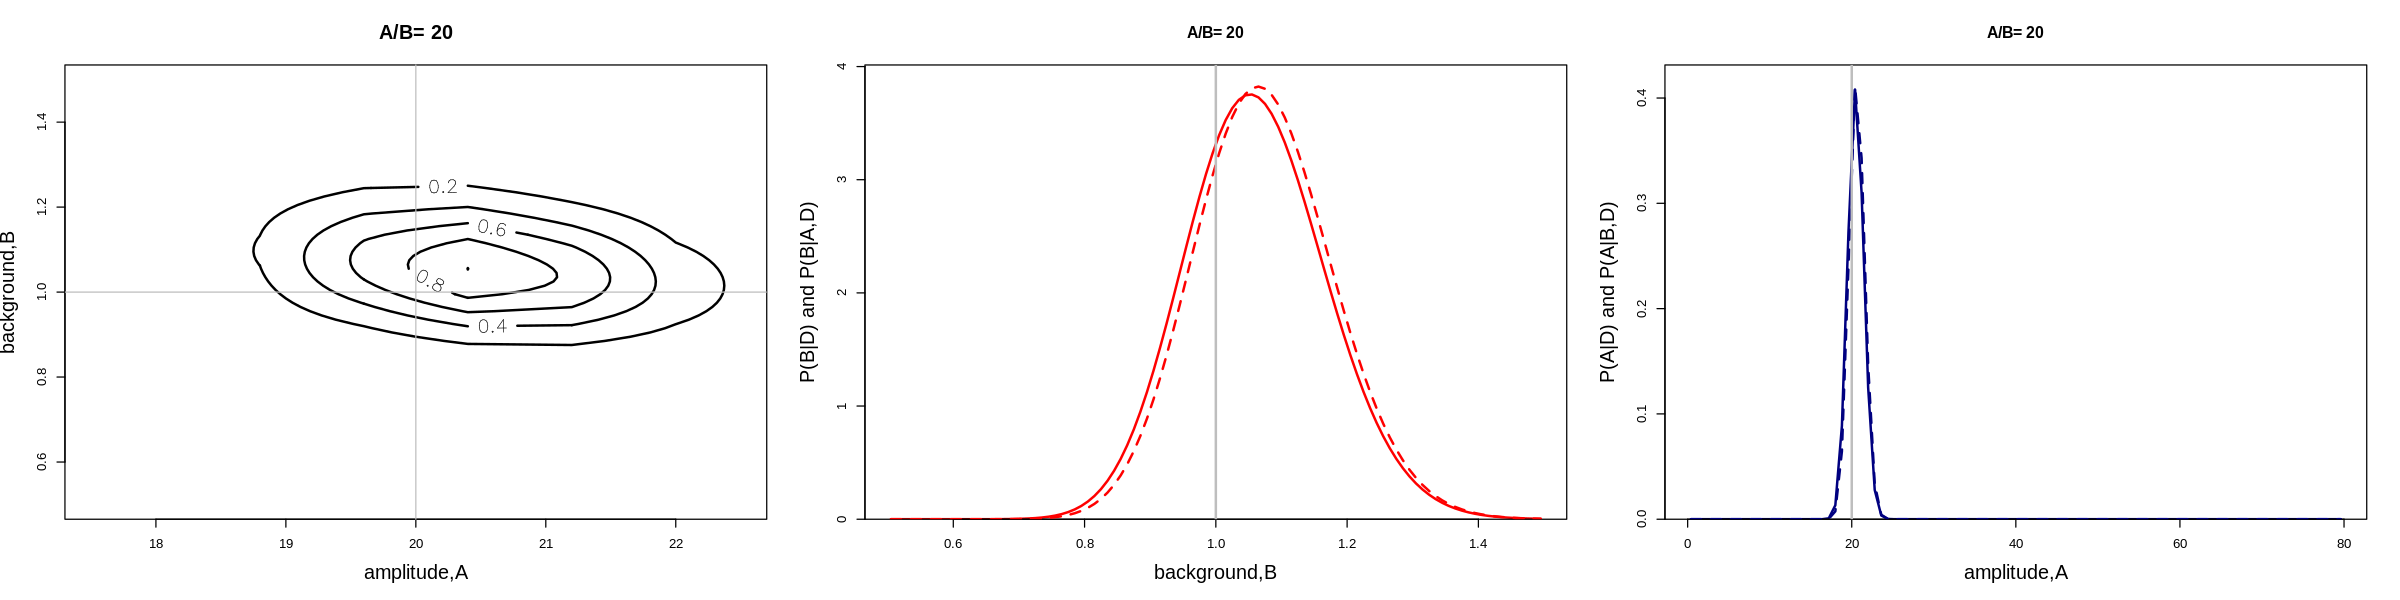

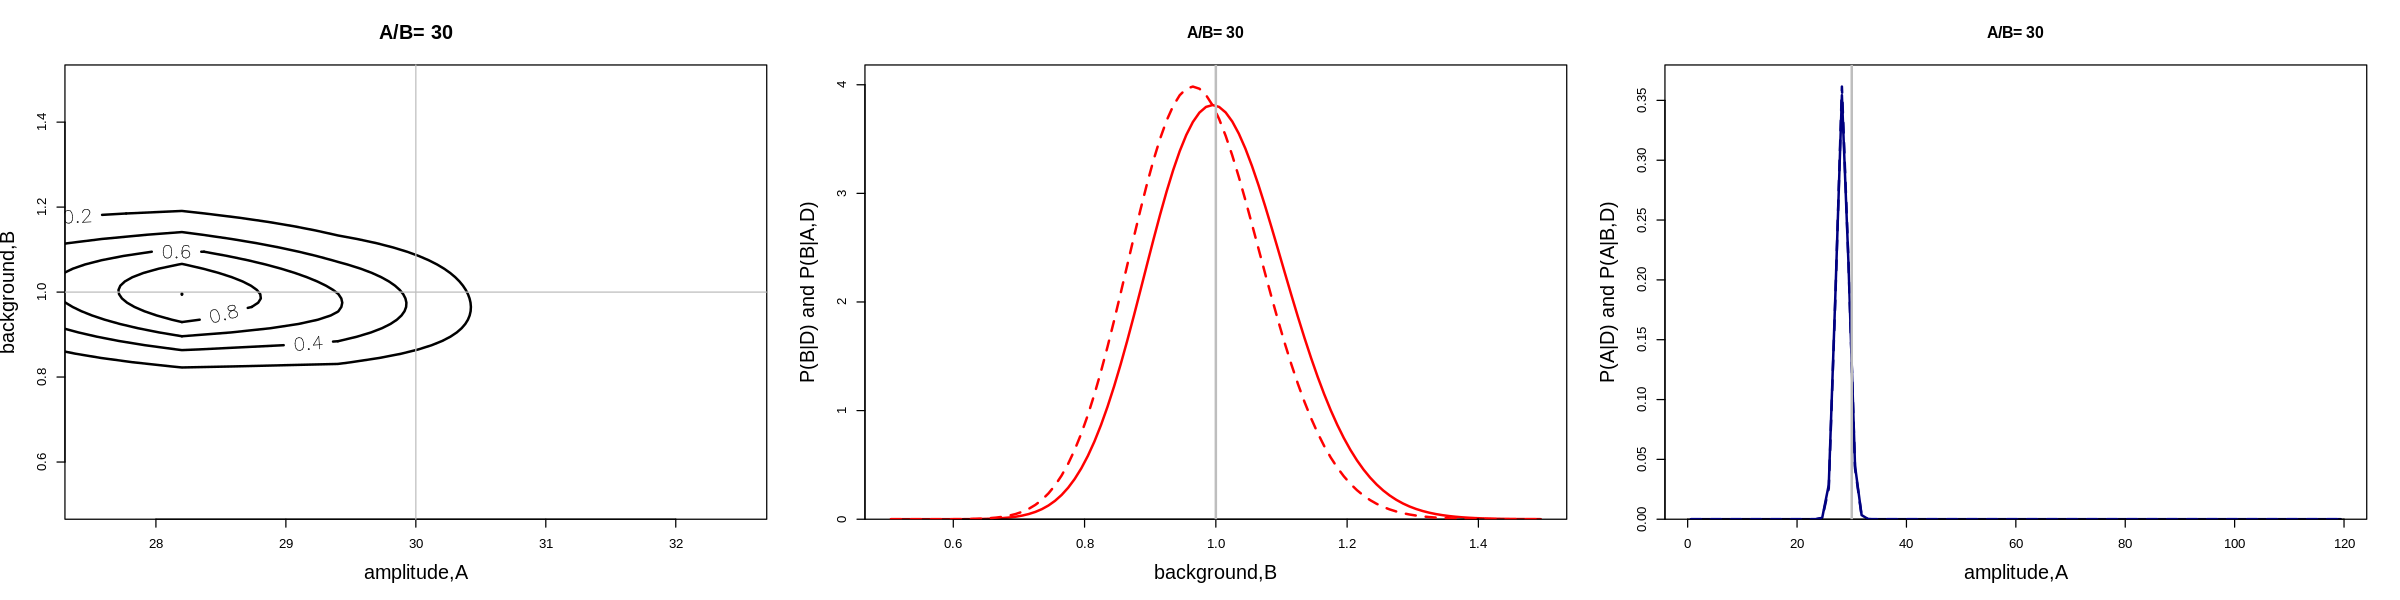

In [11]:
options(repr.plot.width = 20, repr.plot.height = 5) 
par(mfrow=c(1,3))
results <- data.frame()
    
for (A.true in a_vec){
    
    xdat  <-seq(from=-7*w, to=7*w,by=0.5*w)
    s.true <- signal(xdat, A.true, B.true, x0,w,Delta.t)
    ddat  <-rpois(length(s.true), s.true)

    #-Sampling grid for computing posterior
    alim  <-c(0.0,4*A.true)
    blim  <-c(0.5,1.5)
    Nsamp <-100
    uniGrid <-seq(from=1/(2*Nsamp),to=1-1/(2*Nsamp),by=1/Nsamp)
    delta_a <-diff(alim)/Nsamp
    delta_b <-diff(blim)/Nsamp
    a<-alim[1]+diff(alim)*uniGrid
    b<-blim[1]+diff(blim)*uniGrid

    #Log posterior
    log.post <-function(d, x, a, b, x0,w,t){
        if(a<0|| b <0){return(-Inf)} #the effect of the prior
        sum(dpois(d, lambda=signal(x, a, b, x0,w,t),log=TRUE))
    }
    
    
    #Compute log unnormalized posterior, z=lnPˆ*(a,b|D),on a regular grid 
    z<-matrix(data=NA,nrow=length(a),ncol=length(b))
    for(j in 1:length(a)) {for(k in 1:length(b)) {
        z[j,k] <-log.post(ddat, xdat, a[j], b[k], x0,w,Delta.t)
        }
    }
    
    z<-z-max(z) #setmaximumtozero
    
    #Plot unnormalized 2D posterior as contours

    contour(a, b,exp(z),
            nlevels=5,labcex =1,lwd =2,
            xlab="amplitude,A",ylab="background,B", cex.lab=1.5, main=paste("A/B=",A.true/B.true),
            cex.main=1.5,  xlim=c(A.true-2.5,A.true+2.5))
    abline(v=A.true,h=1,col="grey")
    
    #Compute normalized marginalized posteriors, P(a|D) and P(b|D)
    #by summing over other parameter.Normalize byg ridding.
    p_a_D<-apply(exp(z),1,sum)
    p_a_D<- p_a_D/(delta_a*sum(p_a_D))
    p_b_D<-apply(exp(z),2,sum)
    p_b_D<- p_b_D/(delta_b*sum(p_b_D))

    #Compute normalized conditional posteriors,P(a|b,D) and P(b|a,D)
    #using true values of conditioned parameters.Vectorize(func,par)
    #makes a vectorized function out of func in the parameter par.

    p_a_bD <-exp(Vectorize(log.post,"a")(ddat, xdat, a, B.true,x0,w,Delta.t))

    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <-exp(Vectorize(log.post,"b")(ddat, xdat, A.true, b,x0,w,Delta.t))

    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))

    #par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))


    #Plot the 1D marginalized posteriors

    plot(b, p_b_D,xlab="background,B",yaxs="i",ylim=1.05*c(0,max(p_b_D,p_b_aD)), main=paste("A/B=",A.true/B.true) , 
         ylab="P(B|D) and P(B|A,D)",type="l",lwd=2 , cex.lab=1.5, col="red")
    lines(b, p_b_aD, lwd=2,lty=2,  col="red")
    abline(v=B.true,col="grey", lwd=2)

    plot(a, p_a_D,xlab="amplitude,A",yaxs="i",ylim=1.05*c(0,max(p_a_D,p_a_bD)), main=paste("A/B=",A.true/B.true) , 
         ylab="P(A|D) and P(A|B,D)",type="l",lwd=2, cex.lab=1.5, cex=1, col="navy")
    lines(a, p_a_bD, lwd=2,lty=2,  col="navy")
    abline(v=A.true,col="grey", lwd=2)


    #Compute mean,standard deviation,covariance,correlation,of A and B 
    mean_a <- delta_a *sum(a * p_a_D)
    mean_b <- delta_b *sum(b * p_b_D)
    sd_a   <-sqrt(delta_a*sum((a-mean_a)^2*p_a_D))
    sd_b   <-sqrt(delta_b*sum((b-mean_b)^2*p_b_D))


    #Covariance normalization is performed with ’bruteforce’
    #The normalization constant is Z=delta_a*delta_b*sum(exp(z)).
    #This is independent of(a,b) so can be calculated out side of the loops.

    cov_ab <-0
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            cov_ab <-cov_ab + (a[j]-mean_a)*(b[k]-mean_b)*exp(z[j,k])
        }
    }

    cov_ab <-cov_ab /sum(exp(z))
    rho_ab <-cov_ab / (sd_a *sd_b)


    #cat("a=",mean_a,"+/-",sd_a,"\n")
    #cat("b=",mean_b,"+/-",sd_b,"\n")
    #cat("rho=",rho_ab,"\n")
    
    df <- data.frame(mean_a, sd_a, mean_b, sd_b, rho_ab)
    results <- rbind(results,df)
    cat("\n")
    
}


In [12]:
options(digits=2)
results['A/B'] <- a_vec
results

mean_a,sd_a,mean_b,sd_b,rho_ab,A/B
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.36,0.23,0.94,0.088,-0.35,0.25
0.99,0.32,0.74,0.083,-0.40,0.50
1.19,0.36,0.95,0.095,-0.42,1.00
2.00,0.40,0.88,0.092,-0.37,2.00
2.91,0.45,1.01,0.098,-0.35,3.00
5.00,0.54,1.01,0.099,-0.31,5.00
11.79,0.76,1.01,0.101,-0.25,10.00
20.51,0.98,1.06,0.107,-0.22,20.00
28.29,1.13,1.01,0.105,-0.20,30.00
